# *0.* 패키지 & 데이터 불러오기

In [1]:
from google.colab import drive # 드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import time
import re
import csv
import time
import os
import warnings
import random
from matplotlib import pyplot as plt
from datetime import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# *1.* 데이터 전처리

## 1) 기본 데이터 전처리

< 처리 내용>

1. 칼럼명 rename 진행

2. user_type 칼럼 내 특수문자 제거

3. 발색력, 지속력, 발림성, 발색력, star 칼럼 점수로 변환

4. user_type 칼럼 유형별로 세분화

5. write date 날짜로 유형변경

6. 모든 문자 데이터 label encoding 진행

7. 파생변수 생성 - 광고 유저, 세부 점수 기반 rating 칼럼

In [3]:
data_path='/content/drive/MyDrive/[2022-2]캡스톤디자인/project/'
df=pd.read_excel(data_path+'review.xlsx')
df2=pd.read_excel(data_path+'올리브영_세부정보.xlsx')

In [4]:
df=df.drop(['Unnamed: 0'], axis=1)
df

,user_id,item_name,item_option,user_rank,user_type,star,write_date,rate_1,rate_2,rate_3,rate_4,올리브영 후기 유무
0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,지성\n가을웜톤\n모공\n트러블,5점만점에 4점,2022.08.04,보통이에요,보통이에요,아주 만족해요,보통이에요,NaN
1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,* 본 상품 후기는 올영체험단으로 선정되어 CJ올리브영으로부터 위 상품을 무료로 제...,NaN,NaN,5점만점에 4점,2022.09.07,보통이에요,보통이에요,보통이에요,아주 촉촉해요,NaN
2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,민감성\n봄웜톤\n모공\n민감성,5점만점에 4점,2022.08.31,보통이에요,보통이에요,보통이에요,매트해요,NaN
3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,* 본 상품 후기는 올영체험단으로 선정되어 CJ올리브영으로부터 위 상품을 무료로 제...,NaN,NaN,5점만점에 4점,2022.09.06,보통이에요,보통이에요,보통이에요,보통이에요,NaN
4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,지성\n가을웜톤\n모공\n트러블,5점만점에 5점,2022.10.14,아주 만족해요,보통이에요,아주 만족해요,보통이에요,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4684,조조0,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 589,NaN,5점만점에 5점,2022.10.02,아주 만족해요,보통이에요,아주 만족해요,아주 촉촉해요,NaN
4685,복합성쿠로미,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 02 무화과 빛,NaN,건성\n쿨톤\n각질\n다크서클,5점만점에 5점,2022.09.26,아주 만족해요,예상보다 짧아요,아주 만족해요,아주 촉촉해요,NaN
4686,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 780,NaN,5점만점에 5점,2022.09.26,아주 만족해요,예상보다 짧아요,아주 만족해요,아주 촉촉해요,NaN
4687,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 05 핑크 미,NaN,건성\n여름쿨톤\n모공\n잡티,5점만점에 5점,2022.09.24,아주 만족해요,보통이에요,아주 만족해요,보통이에요,NaN


In [5]:
df=df.rename(columns={'item_name':'상품명'}) # 머지 위해 칼럼명 변경

In [6]:
df=df.rename(columns={'rate_1':'발색력', 'rate_2':'지속력', 'rate_3':'발림성', 
                     'rate_4':'수분감'})
df

,user_id,상품명,item_option,user_rank,user_type,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무
0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,지성\n가을웜톤\n모공\n트러블,5점만점에 4점,2022.08.04,보통이에요,보통이에요,아주 만족해요,보통이에요,NaN
1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,* 본 상품 후기는 올영체험단으로 선정되어 CJ올리브영으로부터 위 상품을 무료로 제...,NaN,NaN,5점만점에 4점,2022.09.07,보통이에요,보통이에요,보통이에요,아주 촉촉해요,NaN
2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,민감성\n봄웜톤\n모공\n민감성,5점만점에 4점,2022.08.31,보통이에요,보통이에요,보통이에요,매트해요,NaN
3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,* 본 상품 후기는 올영체험단으로 선정되어 CJ올리브영으로부터 위 상품을 무료로 제...,NaN,NaN,5점만점에 4점,2022.09.06,보통이에요,보통이에요,보통이에요,보통이에요,NaN
4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,지성\n가을웜톤\n모공\n트러블,5점만점에 5점,2022.10.14,아주 만족해요,보통이에요,아주 만족해요,보통이에요,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4684,조조0,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 589,NaN,5점만점에 5점,2022.10.02,아주 만족해요,보통이에요,아주 만족해요,아주 촉촉해요,NaN
4685,복합성쿠로미,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 02 무화과 빛,NaN,건성\n쿨톤\n각질\n다크서클,5점만점에 5점,2022.09.26,아주 만족해요,예상보다 짧아요,아주 만족해요,아주 촉촉해요,NaN
4686,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 780,NaN,5점만점에 5점,2022.09.26,아주 만족해요,예상보다 짧아요,아주 만족해요,아주 촉촉해요,NaN
4687,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 05 핑크 미,NaN,건성\n여름쿨톤\n모공\n잡티,5점만점에 5점,2022.09.24,아주 만족해요,보통이에요,아주 만족해요,보통이에요,NaN


In [7]:
# 광고 칼럼 생성
a=[]
for i in range(len(df)):
    if df.iloc[i, 2]=='* 본 상품 후기는 올영체험단으로 선정되어 CJ올리브영으로부터 위 상품을 무료로 제공받아 작성한 것입니다.':
        a.append("1")
        df.iloc[i, 2]=''
    else:
        a.append("0")

In [8]:
df['광고 유무']=a

In [9]:
# user_late 정의
발색=['아주 만족해요', '보통이에요', '다소 아쉬워요']
지속=['지속이 오래돼요','보통이에요','예상보다 짧아요']
발림=['아주 만족해요', '보통이에요', '다소 아쉬워요']
수분=['아주 촉촉해요', '보통이에요','매트해요']

In [10]:
df.replace({'아주 만족해요':3,'지속이 오래돼요':3, '아주 촉촉해요':3}, inplace=True)
df.replace({'보통이에요':2}, inplace=True)
df.replace({'다소 아쉬워요':1,'예상보다 짧아요':1, '매트해요':1}, inplace=True)

In [11]:
df

,user_id,상품명,item_option,user_rank,user_type,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무,광고 유무
0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,지성\n가을웜톤\n모공\n트러블,5점만점에 4점,2022.08.04,2.0,2.0,3.0,2.0,NaN,0
1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,,NaN,NaN,5점만점에 4점,2022.09.07,2.0,2.0,2.0,3.0,NaN,1
2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,민감성\n봄웜톤\n모공\n민감성,5점만점에 4점,2022.08.31,2.0,2.0,2.0,1.0,NaN,0
3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,,NaN,NaN,5점만점에 4점,2022.09.06,2.0,2.0,2.0,2.0,NaN,1
4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,지성\n가을웜톤\n모공\n트러블,5점만점에 5점,2022.10.14,3.0,2.0,3.0,2.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,조조0,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 589,NaN,5점만점에 5점,2022.10.02,3.0,2.0,3.0,3.0,NaN,0
4685,복합성쿠로미,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 02 무화과 빛,NaN,건성\n쿨톤\n각질\n다크서클,5점만점에 5점,2022.09.26,3.0,1.0,3.0,3.0,NaN,0
4686,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 780,NaN,5점만점에 5점,2022.09.26,3.0,1.0,3.0,3.0,NaN,0
4687,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 05 핑크 미,NaN,건성\n여름쿨톤\n모공\n잡티,5점만점에 5점,2022.09.24,3.0,2.0,3.0,2.0,NaN,0


In [12]:
df.replace({'5점만점에 5점':5,'5점만점에 4점':4, '5점만점에 3점':3, '5점만점에 2점':2, '5점만점에 1점':1, '5점만점에 0점':0}, inplace=True)

In [13]:
df=df.reset_index()
df

,index,user_id,상품명,item_option,user_rank,user_type,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무,광고 유무
0,0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,지성\n가을웜톤\n모공\n트러블,4.0,2022.08.04,2.0,2.0,3.0,2.0,NaN,0
1,1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,,NaN,NaN,4.0,2022.09.07,2.0,2.0,2.0,3.0,NaN,1
2,2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,민감성\n봄웜톤\n모공\n민감성,4.0,2022.08.31,2.0,2.0,2.0,1.0,NaN,0
3,3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,,NaN,NaN,4.0,2022.09.06,2.0,2.0,2.0,2.0,NaN,1
4,4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,지성\n가을웜톤\n모공\n트러블,5.0,2022.10.14,3.0,2.0,3.0,2.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,4684,조조0,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 589,NaN,5.0,2022.10.02,3.0,2.0,3.0,3.0,NaN,0
4685,4685,복합성쿠로미,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 02 무화과 빛,NaN,건성\n쿨톤\n각질\n다크서클,5.0,2022.09.26,3.0,1.0,3.0,3.0,NaN,0
4686,4686,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 780,NaN,5.0,2022.09.26,3.0,1.0,3.0,3.0,NaN,0
4687,4687,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 05 핑크 미,NaN,건성\n여름쿨톤\n모공\n잡티,5.0,2022.09.24,3.0,2.0,3.0,2.0,NaN,0


In [14]:
user_type1_list=['복합성', '지성', '민감성', '건성', '약건성', '트러블성', '중성'] # 피부타입
user_type2_list=['쿨톤', '웜톤', '봄웜톤', '여름쿨톤', '가을웜톤', '겨울쿨톤'] # 피부톤
user_type3_list=['잡티', '미백', '주름', '각질', '트러블', '블랙헤드', '피지과다',
            '민감성', '모공', '탄력', '홍조', '아토피', '다크서클'] # 피부고민 (복수선택 가능)
user_type4_list=['스킨케어', '마스크팩', '클렌징', '선케어', '더모 코스메틱', '메이크업',
            '네일', '바디케어', '헤어케어', '향수/디퓨저', '미용소품', '남성',
            '건강/위생용품', '건강식품', '푸드', '라이프/홈', '반려동물', '베이비']

In [15]:
df['user_type'].str.split('\n').tolist()

[['지성', '가을웜톤', '모공', '트러블'],
 nan,
 ['민감성', '봄웜톤', '모공', '민감성'],
 nan,
 ['지성', '가을웜톤', '모공', '트러블'],
 nan,
 ['복합성', '봄웜톤', '모공', '아토피'],
 nan,
 ['복합성', '쿨톤', '미백', '블랙헤드'],
 nan,
 nan,
 ['복합성', '가을웜톤', '모공', '블랙헤드'],
 nan,
 nan,
 nan,
 ['복합성', '봄웜톤', '각질', '모공'],
 nan,
 ['복합성', '봄웜톤', '민감성', '잡티'],
 nan,
 ['트러블성', '가을웜톤', '트러블'],
 nan,
 ['복합성', '웜톤', '모공', '민감성'],
 nan,
 nan,
 nan,
 ['복합성', '쿨톤', '미백', '블랙헤드'],
 nan,
 nan,
 ['복합성', '가을웜톤', '각질', '모공'],
 nan,
 ['메이크업 분야 탑리뷰어'],
 nan,
 nan,
 ['복합성', '웜톤', '모공', '민감성'],
 nan,
 nan,
 nan,
 nan,
 ['건성', '쿨톤', '각질', '탄력'],
 nan,
 nan,
 nan,
 ['지성', '가을웜톤', '모공', '트러블'],
 nan,
 ['지성', '웜톤', '모공', '트러블'],
 nan,
 ['지성', '가을웜톤', '모공', '트러블'],
 nan,
 ['복합성', '웜톤', '각질', '모공'],
 nan,
 nan,
 ['건성', '봄웜톤', '민감성', '잡티'],
 nan,
 ['복합성', '가을웜톤', '각질', '다크서클'],
 nan,
 ['복합성', '민감성', '트러블'],
 nan,
 nan,
 ['복합성', '웜톤', '모공', '민감성'],
 nan,
 nan,
 nan,
 ['복합성', '웜톤', '민감성', '트러블'],
 nan,
 ['지성', '웜톤', '모공', '민감성'],
 nan,
 nan,
 nan,
 nan,
 ['건성', '웜톤', '민감

In [16]:
df['user_type']=df['user_type'].fillna('')

In [17]:
user_type=pd.DataFrame(df['user_type'].str.split('\n').tolist(),columns=['user_type1','user_type2','user_type3','user_type4']) # 4개까지 등록 가능
user_type

,user_type1,user_type2,user_type3,user_type4
0,지성,가을웜톤,모공,트러블
1,,None,None,None
2,민감성,봄웜톤,모공,민감성
3,,None,None,None
4,지성,가을웜톤,모공,트러블
...,...,...,...,...
4684,,None,None,None
4685,건성,쿨톤,각질,다크서클
4686,,None,None,None
4687,건성,여름쿨톤,모공,잡티


In [18]:
user_type.user_type1.value_counts()

                   2858
복합성                 734
건성                  361
메이크업 분야 탑리뷰어        215
지성                  169
민감성                 117
트러블성                 59
건강/위생용품 분야 탑리뷰어      27
헤어케어 분야 탑리뷰어         21
약건성                  20
중성                   20
바디케어 분야 탑리뷰어         19
선케어 분야 탑리뷰어          18
마스크팩 분야 탑리뷰어         11
클렌징 분야 탑리뷰어          10
미용소품 분야 탑리뷰어          8
스킨케어 분야 탑리뷰어          7
네일 분야 탑리뷰어            6
푸드 분야 탑리뷰어            5
건강식품 분야 탑리뷰어          3
향수/디퓨저 분야 탑리뷰어        1
Name: user_type1, dtype: int64

In [19]:
list1=[]
list2=[]
list3=[]
list4=[]

In [20]:
user_type['탑리뷰어']=0

In [21]:
user_type.loc[user_type['user_type1'].str.contains('탑리뷰어'), '탑리뷰어']=1
user_type.loc[user_type['user_type1'].str.contains('탑리뷰어'), 'user_type1']=''

In [22]:
user_type['탑리뷰어'].value_counts()

0    4338
1     351
Name: 탑리뷰어, dtype: int64

In [23]:
user_type['user_type1'].value_counts()

        3209
복합성      734
건성       361
지성       169
민감성      117
트러블성      59
약건성       20
중성        20
Name: user_type1, dtype: int64

In [24]:
user_type.user_type2.value_counts()

웜톤      379
쿨톤      338
여름쿨톤    246
봄웜톤     224
가을웜톤    148
겨울쿨톤     99
민감성      21
각질        9
모공        6
미백        4
다크서클      2
Name: user_type2, dtype: int64

In [25]:
list1=[]
list2=[]
list3=[]
list4=[]

for i in range(len(user_type)):

    if user_type.iloc[i, 1] in user_type1_list:
        list1.append(user_type.iloc[i, 1])
    else: 
      list1.append('')

    if user_type.iloc[i, 1] in user_type2_list:
        list2.append(user_type.iloc[i, 1])
    else:
        list2.append('')
    
    if user_type.iloc[i, 1] in user_type3_list:
        list3.append(user_type.iloc[i, 1])
    else:
        list3.append('')

    if user_type.iloc[i, 1] in user_type4_list:
        list4.append(user_type.iloc[i, 1])
    else:
        list4.append('')

In [26]:
type2=pd.DataFrame(data=[list2, list3]).T
type2.columns=['user_type2-1', 'user_type5']

In [27]:
type2

,user_type2-1,user_type5
0,가을웜톤,
1,,
2,봄웜톤,
3,,
4,가을웜톤,
...,...,...
4684,,
4685,쿨톤,
4686,,
4687,여름쿨톤,


In [28]:
type2.value_counts()

user_type2-1  user_type5
                            3213
웜톤                           379
쿨톤                           338
여름쿨톤                         246
봄웜톤                          224
가을웜톤                         148
겨울쿨톤                          99
              민감성             21
              각질               9
              모공               6
              미백               4
              다크서클             2
dtype: int64

In [29]:
user_type.user_type3.value_counts()

모공      454
각질      380
민감성     194
다크서클    110
미백       92
트러블      75
블랙헤드     54
잡티       34
아토피      14
주름       11
홍조        7
탄력        6
Name: user_type3, dtype: int64

In [30]:
user_type.user_type4.value_counts()

모공      274
민감성     236
미백      162
블랙헤드    160
잡티      127
트러블      87
다크서클     73
탄력       69
홍조       26
주름       23
아토피      13
피지과다      4
Name: user_type4, dtype: int64

In [31]:
user_type.user_type2.value_counts()

웜톤      379
쿨톤      338
여름쿨톤    246
봄웜톤     224
가을웜톤    148
겨울쿨톤     99
민감성      21
각질        9
모공        6
미백        4
다크서클      2
Name: user_type2, dtype: int64

In [32]:
user_type

,user_type1,user_type2,user_type3,user_type4,탑리뷰어
0,지성,가을웜톤,모공,트러블,0
1,,None,None,None,0
2,민감성,봄웜톤,모공,민감성,0
3,,None,None,None,0
4,지성,가을웜톤,모공,트러블,0
...,...,...,...,...,...
4684,,None,None,None,0
4685,건성,쿨톤,각질,다크서클,0
4686,,None,None,None,0
4687,건성,여름쿨톤,모공,잡티,0


In [33]:
type2

,user_type2-1,user_type5
0,가을웜톤,
1,,
2,봄웜톤,
3,,
4,가을웜톤,
...,...,...
4684,,
4685,쿨톤,
4686,,
4687,여름쿨톤,


In [34]:
user_type_sum=pd.concat([user_type, type2], axis=1)
user_type_sum=user_type_sum.drop('user_type2', axis=1)
user_type_sum

,user_type1,user_type3,user_type4,탑리뷰어,user_type2-1,user_type5
0,지성,모공,트러블,0,가을웜톤,
1,,None,None,0,,
2,민감성,모공,민감성,0,봄웜톤,
3,,None,None,0,,
4,지성,모공,트러블,0,가을웜톤,
...,...,...,...,...,...,...
4684,,None,None,0,,
4685,건성,각질,다크서클,0,쿨톤,
4686,,None,None,0,,
4687,건성,모공,잡티,0,여름쿨톤,


In [35]:
user_type_sum.user_type5.value_counts()

        4647
민감성       21
각질         9
모공         6
미백         4
다크서클       2
Name: user_type5, dtype: int64

In [36]:
user_type_sum=user_type_sum.rename(columns= {'user_type2-1': 'user_type2'})
user_type_sum[['user_type1', 'user_type2', 'user_type3', 'user_type4', 'user_type5', '탑리뷰어']]

,user_type1,user_type2,user_type3,user_type4,user_type5,탑리뷰어
0,지성,가을웜톤,모공,트러블,,0
1,,,None,None,,0
2,민감성,봄웜톤,모공,민감성,,0
3,,,None,None,,0
4,지성,가을웜톤,모공,트러블,,0
...,...,...,...,...,...,...
4684,,,None,None,,0
4685,건성,쿨톤,각질,다크서클,,0
4686,,,None,None,,0
4687,건성,여름쿨톤,모공,잡티,,0


In [160]:
#user_type_sum=user_type_sum.fillna('')

In [37]:
df_sum=pd.concat([df, user_type_sum], axis=1)
df_sum=df_sum.drop('user_type', axis=1)
df_sum

,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무,광고 유무,user_type1,user_type3,user_type4,탑리뷰어,user_type2,user_type5
0,0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022.08.04,2.0,2.0,3.0,2.0,NaN,0,지성,모공,트러블,0,가을웜톤,
1,1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,,NaN,4.0,2022.09.07,2.0,2.0,2.0,3.0,NaN,1,,None,None,0,,
2,2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022.08.31,2.0,2.0,2.0,1.0,NaN,0,민감성,모공,민감성,0,봄웜톤,
3,3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,,NaN,4.0,2022.09.06,2.0,2.0,2.0,2.0,NaN,1,,None,None,0,,
4,4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022.10.14,3.0,2.0,3.0,2.0,NaN,0,지성,모공,트러블,0,가을웜톤,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,4684,조조0,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 589,5.0,2022.10.02,3.0,2.0,3.0,3.0,NaN,0,,None,None,0,,
4685,4685,복합성쿠로미,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 02 무화과 빛,NaN,5.0,2022.09.26,3.0,1.0,3.0,3.0,NaN,0,건성,각질,다크서클,0,쿨톤,
4686,4686,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 780,5.0,2022.09.26,3.0,1.0,3.0,3.0,NaN,0,,None,None,0,,
4687,4687,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 05 핑크 미,NaN,5.0,2022.09.24,3.0,2.0,3.0,2.0,NaN,0,건성,모공,잡티,0,여름쿨톤,


In [38]:
# 날짜 형태로 유형 변경
df_sum['write_date'] = pd.to_datetime(df_sum['write_date'])
df_sum['write_date'] = df_sum['write_date'].dt.strftime('%Y-%m-%d').astype(str)

In [39]:
df_sum.head()

,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무,광고 유무,user_type1,user_type3,user_type4,탑리뷰어,user_type2,user_type5
0,0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022-08-04,2.0,2.0,3.0,2.0,NaN,0,지성,모공,트러블,0,가을웜톤,
1,1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,,NaN,4.0,2022-09-07,2.0,2.0,2.0,3.0,NaN,1,,None,None,0,,
2,2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022-08-31,2.0,2.0,2.0,1.0,NaN,0,민감성,모공,민감성,0,봄웜톤,
3,3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,,NaN,4.0,2022-09-06,2.0,2.0,2.0,2.0,NaN,1,,None,None,0,,
4,4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022-10-14,3.0,2.0,3.0,2.0,NaN,0,지성,모공,트러블,0,가을웜톤,


In [47]:
df_sum.user_type2.value_counts()

        3255
웜톤       379
쿨톤       338
여름쿨톤     246
봄웜톤      224
가을웜톤     148
겨울쿨톤      99
Name: user_type2, dtype: int64

In [51]:
df_sum['광고 유무'].value_counts()

0    4119
1     570
Name: 광고 유무, dtype: int64

In [52]:
# 숫자 데이터 라벨로 변경
from sklearn.preprocessing import LabelEncoder
df_item=df_sum['상품명']

le=LabelEncoder()
le.fit(df_item)
df_sum['item_no']=le.transform(df_item)

df_user=df_sum['user_id']
le=LabelEncoder()
le.fit(df_user)
df_sum['user_no']=le.transform(df_user)

In [53]:
# 파생변수 생성 - 전체 유저가 매긴 세부 항목 관련 점수
df_sum['rating']=df_sum['발색력']+df_sum['지속력']+df_sum['발림성']+df_sum['수분감']

In [59]:
df_sum.to_excel(data_path+'df_clean.xlsx')# 전처리 후 중간저장
df_sum.to_csv(data_path+'df_clean.csv') # 전처리 후 중간저장

## 2) 데이터 합치기

In [60]:
data_path='/content/drive/MyDrive/[2022-2]캡스톤디자인/project/'
df_sum=pd.read_excel(data_path+'df_clean.xlsx')
df2=pd.read_excel(data_path+'올리브영_세부정보.xlsx')

In [61]:
df_sum.columns

Index(['Unnamed: 0', 'index', 'user_id', '상품명', 'item_option', 'user_rank',
       'star', 'write_date', '발색력', '지속력', '발림성', '수분감', '올리브영 후기 유무', '광고 유무',
       'user_type1', 'user_type3', 'user_type4', '탑리뷰어', 'user_type2',
       'user_type5', 'item_no', 'user_no', 'rating'],
      dtype='object')

In [62]:
df_sum.head()

,Unnamed: 0,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,...,광고 유무,user_type1,user_type3,user_type4,탑리뷰어,user_type2,user_type5,item_no,user_no,rating
0,0,0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022-08-04,2.0,2.0,...,0,지성,모공,트러블,0,가을웜톤,NaN,12,1599,9.0
1,1,1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-07,2.0,2.0,...,1,NaN,NaN,NaN,0,NaN,NaN,12,637,9.0
2,2,2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022-08-31,2.0,2.0,...,0,민감성,모공,민감성,0,봄웜톤,NaN,12,1599,7.0
3,3,3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-06,2.0,2.0,...,1,NaN,NaN,NaN,0,NaN,NaN,12,1362,8.0
4,4,4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022-10-14,3.0,2.0,...,0,지성,모공,트러블,0,가을웜톤,NaN,12,1722,10.0


In [63]:
df_sum=df_sum.drop(['Unnamed: 0'], axis=1)

In [64]:
df2.head()

,브랜드,상품명,가격,평가,리뷰수,평균별점,5점,4점,3점,2점,...,발색력1,지속력1,지속력2,지속력3,발림성1,발림성2,발림성3,수분감1,수분감2,수분감3
0,롬앤,[NEW] 롬앤 제로 매트 립스틱,8900,최고,8879,4.6,0.72,0.19,0.07,0.01,...,다소아쉬워요4%,지속이 오래돼요29%,보통이에요61%,예상보다 짧아요10%,아주 만족해요55%\n,보통이에요37%\n,다소 아쉬워요8%,아주촉촉해요11%,보통이에요45%,매트해요44%
1,롬앤,[NEW] 롬앤 듀이풀 워터 틴트,8900,최고,5070,4.6,0.74,0.18,0.07,0.01,...,다소아쉬워요6%,지속이 오래돼요27%,보통이에요60%,예상보다 짧아요13%,아주 만족해요67%\n,보통이에요31%\n,다소 아쉬워요2%,아주촉촉해요68%,보통이에요32%,매트해요0%
2,롬앤,[NEW] 롬앤 쥬시 래스팅 틴트,8400,최고,25698,4.7,0.75,0.19,0.06,0.01,...,다소아쉬워요4%,지속이 오래돼요30%,보통이에요58%,예상보다 짧아요12%,아주 만족해요68%\n,보통이에요30%\n,다소 아쉬워요2%,아주촉촉해요69%,보통이에요31%,매트해요0%
3,바닐라코,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400,최고,92,4.6,0.76,0.16,0.04,0.02,...,다소아쉬워요9%,지속이 오래돼요41%,보통이에요53%,예상보다 짧아요6%,아주 만족해요67%\n,보통이에요33%\n,다소 아쉬워요1%,아주촉촉해요70%,보통이에요30%,매트해요0%
4,헤라,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000,최고,16,4.8,0.75,0.25,0.00,0.00,...,다소아쉬워요0%,지속이 오래돼요25%,보통이에요75%,예상보다 짧아요0%,아주 만족해요88%\n,보통이에요13%\n,다소 아쉬워요0%,아주촉촉해요38%,보통이에요38%,매트해요25%


In [65]:
df2.columns

Index(['브랜드', '상품명', '가격', '평가', '리뷰수', '평균별점', '5점', '4점', '3점', '2점', '1점',
       '발색력3', '발색력2', '발색력1', '지속력1', '지속력2', '지속력3', '발림성1', '발림성2', '발림성3',
       '수분감1', '수분감2', '수분감3'],
      dtype='object')

In [67]:
df2['발색력3'] = df2['발색력3'].str.extract(r'(\d+)').astype('int')/100
df2['발색력2'] = df2['발색력2'].str.extract(r'(\d+)').astype('int')/100
df2['발색력1'] = df2['발색력1'].str.extract(r'(\d+)').astype('int')/100
df2['지속력3'] = df2['지속력3'].str.extract(r'(\d+)').astype('int')/100
df2['지속력2'] = df2['지속력2'].str.extract(r'(\d+)').astype('int')/100
df2['지속력1'] = df2['지속력1'].str.extract(r'(\d+)').astype('int')/100
df2['발림성3'] = df2['발림성3'].str.extract(r'(\d+)').astype('int')/100
df2['발림성2'] = df2['발림성2'].str.extract(r'(\d+)').astype('int')/100
df2['발림성1'] = df2['발림성1'].str.extract(r'(\d+)').astype('int')/100
df2['수분감3'] = df2['수분감3'].str.extract(r'(\d+)').astype('int')/100
df2['수분감2'] = df2['수분감2'].str.extract(r'(\d+)').astype('int')/100
df2['수분감1'] = df2['수분감1'].str.extract(r'(\d+)').astype('int')/100



In [68]:
df2['발색력점수'] = df2['발색력1']*3 + df2['발색력2']*2 + df2['발색력3']*1
df2['지속력점수'] = df2['지속력1']*3 + df2['지속력2']*2 + df2['지속력3']*1
df2['발림성점수'] = df2['발림성1']*3 + df2['발림성2']*2 + df2['발림성3']*1
df2['수분감점수'] = df2['수분감1']*3 + df2['수분감2']*2 + df2['수분감3']*1

In [69]:
df2 = df2[['브랜드','상품명','가격','평균별점','발색력점수','지속력점수','발림성점수','수분감점수']]
df2

,브랜드,상품명,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수
0,롬앤,[NEW] 롬앤 제로 매트 립스틱,8900,4.6,1.38,2.19,2.47,1.67
1,롬앤,[NEW] 롬앤 듀이풀 워터 틴트,8900,4.6,1.46,2.14,2.65,2.68
2,롬앤,[NEW] 롬앤 쥬시 래스팅 틴트,8400,4.7,1.37,2.18,2.66,2.69
3,바닐라코,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400,4.6,1.46,2.35,2.68,2.70
4,헤라,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000,4.8,1.19,2.25,2.90,2.15
...,...,...,...,...,...,...,...,...
56,에스쁘아,에스쁘아 꾸뛰르 립틴트 벨벳,20000,4.6,1.37,2.15,2.59,2.05
57,맥,MAC 파우더 키스 벨벳 블러 슬림 스틱 립스틱,39000,4.6,1.18,2.29,2.82,2.23
58,에뛰드,[민스코PICK] 에뛰드 픽싱 틴트 바,12800,4.4,1.43,2.30,2.55,1.94
59,헤라,헤라 루즈 홀릭 쉬어 매트 3g / 8 color,34000,4.8,1.21,2.39,2.87,2.25


In [70]:
df=pd.merge(df_sum, df2, on='상품명')

In [71]:
df.head()

,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,...,item_no,user_no,rating,브랜드,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수
0,0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022-08-04,2.0,2.0,3.0,...,12,1599,9.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83
1,1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-07,2.0,2.0,2.0,...,12,637,9.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83
2,2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022-08-31,2.0,2.0,2.0,...,12,1599,7.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83
3,3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-06,2.0,2.0,2.0,...,12,1362,8.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83
4,4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022-10-14,3.0,2.0,3.0,...,12,1722,10.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83


In [72]:
df.columns

Index(['index', 'user_id', '상품명', 'item_option', 'user_rank', 'star',
       'write_date', '발색력', '지속력', '발림성', '수분감', '올리브영 후기 유무', '광고 유무',
       'user_type1', 'user_type3', 'user_type4', '탑리뷰어', 'user_type2',
       'user_type5', 'item_no', 'user_no', 'rating', '브랜드', '가격', '평균별점',
       '발색력점수', '지속력점수', '발림성점수', '수분감점수'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4029 entries, 0 to 4028
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4029 non-null   int64  
 1   user_id      4019 non-null   object 
 2   상품명          4029 non-null   object 
 3   item_option  3595 non-null   object 
 4   user_rank    1552 non-null   object 
 5   star         4019 non-null   float64
 6   write_date   4019 non-null   object 
 7   발색력          4019 non-null   float64
 8   지속력          4019 non-null   float64
 9   발림성          4019 non-null   float64
 10  수분감          4019 non-null   float64
 11  올리브영 후기 유무   0 non-null      float64
 12  광고 유무        4029 non-null   int64  
 13  user_type1   1240 non-null   object 
 14  user_type3   1195 non-null   object 
 15  user_type4   1046 non-null   object 
 16  탑리뷰어         4029 non-null   int64  
 17  user_type2   1207 non-null   object 
 18  user_type5   31 non-null     object 
 19  item_n

In [277]:
df=df.iloc[:,2:]

In [77]:
df.to_csv(data_path+'df_sum.csv')
df.to_csv(data_path+'df_sum.xlsx')

## 3) 기초통계량 확인

In [179]:
df.head()

,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무,...,user_type4,탑리뷰어,item_no,user_no,rating,브랜드,가격,평가,리뷰수,평균별점
0,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022-08-04,2.0,2.0,3.0,2.0,NaN,...,트러블,0,12,1599,9.0,무지개맨션,18000,최고,1064,4.7
1,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-07,2.0,2.0,2.0,3.0,NaN,...,NaN,0,12,637,9.0,무지개맨션,18000,최고,1064,4.7
2,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022-08-31,2.0,2.0,2.0,1.0,NaN,...,민감성,0,12,1599,7.0,무지개맨션,18000,최고,1064,4.7
3,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-06,2.0,2.0,2.0,2.0,NaN,...,NaN,0,12,1362,8.0,무지개맨션,18000,최고,1064,4.7
4,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022-10-14,3.0,2.0,3.0,2.0,NaN,...,트러블,0,12,1722,10.0,무지개맨션,18000,최고,1064,4.7


In [180]:
df['star'].value_counts() # 별점

5.0    2764
4.0     888
3.0     246
2.0      62
1.0      59
Name: star, dtype: int64

In [181]:
df['발색력'].value_counts() # 발색력

3.0    2931
2.0     866
1.0     222
Name: 발색력, dtype: int64

In [182]:
df['수분감'].value_counts() # 수분감

2.0    1543
3.0    1468
1.0    1008
Name: 수분감, dtype: int64

In [183]:
df['발림성'].value_counts() # 발림성

3.0    2943
2.0     913
1.0     163
Name: 발림성, dtype: int64

In [184]:
df['지속력'].value_counts() # 지속력

2.0    1973
3.0    1571
1.0     475
Name: 지속력, dtype: int64

In [185]:
df['rating'].value_counts() # 지속력

10.0    1084
11.0     878
9.0      825
8.0      494
12.0     467
7.0      153
6.0       81
4.0       24
5.0       13
Name: rating, dtype: int64

- 기본 평점은 많은 유저들이 5점을 주었으며 3~4점 등의 높은 점수를 준 유저들이 많이 분포한 것을 알 수 있다.

- 세부 특성 중 수분감과 발색력은 좋다고 평가한 고객이 제일 많고 발림성과 지속력은 보통이라고 평가한 고객이 제일 많은 것을 알 수 있다.

# *2.* EDA

## 1) 기본 평점 관련 EDA

In [ ]:
df.columns

Index(['index', 'user_id', '상품명', 'item_option', 'user_rank', 'star',
       'write_date', '발색력', '지속력', '발림성', '수분감', '올리브영 후기 유무', 'user_type1',
       'user_type2', 'user_type3', 'user_type4', '탑리뷰어', '브랜드', '가격', '평가',
       '리뷰수', '평균별점'],
      dtype='object')

In [ ]:
n_user = len(df['user_id'].unique())    # 유저 수
n_item = len(df['상품명'].unique())    # 아이템 수

print('유저 수 :', n_user, '아이템 수 :', n_item)

유저 수 : 1578 아이템 수 : 38


In [ ]:
df[['star']].describe() # 평균 평점 겁나 높음

,star
count,4019.000000
mean,4.551630
std,0.799147
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


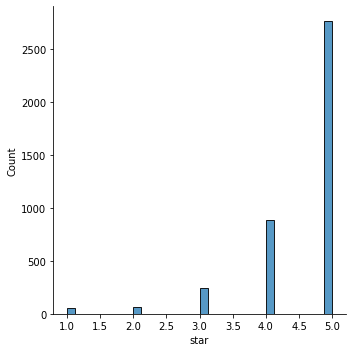

In [ ]:
sns.displot(df['star'])

In [ ]:
# 사용자 별로 aggregate한 데이터 확인 => 너무 후하거나 박하게 점수를 준 유저 찾기 => 아예 빼도 되고 보정해서 써도 됨
user_stastics = pd.DataFrame({
    'numstar' : df.groupby('user_id')['index'].nunique(),
    'avgstar' : df.groupby('user_id')['index'].mean(),
    'stdstar' : df.groupby('user_id')['index'].std(),
}).reset_index()

user_stastics.head()

,user_id,numRating,avgRating,stdRating
0,018301,2,1054.500000,764.382430
1,02****,1,3145.000000,NaN
2,0326,10,3134.000000,1263.610383
3,0live,1,3139.000000,NaN
4,17호빋베브봄,18,1710.444444,1550.380455


In [ ]:
user_stastics.numstar.sort_values(ascending=False)

189     47
100     37
1569    37
1522    31
75      28
        ..
717      1
718      1
719      1
722      1
1576     1
Name: numRating, Length: 1577, dtype: int64

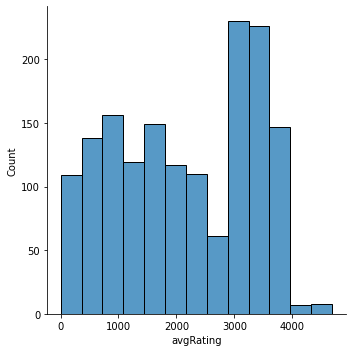

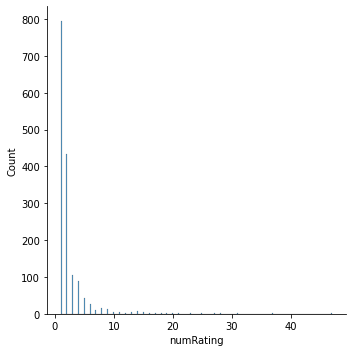

In [ ]:
# 사용자의 평점 분포
# print('{0:=^43}'.format('사용자의 평점 분포'))
sns.displot(user_stastics['avgstar'])

# 사용자 평가 아이템 개수 분포
sns.displot(user_stastics['numstar'])

In [ ]:
광고=df.loc[df['올리브영 후기 유무']==1]

In [ ]:
광고.user_id.value_counts()

Zen       6
미즈옹       5
하이힐소년     5
desire    4
행복바라기     4
         ..
아롱모찌      1
너구리Vv     1
밤여름       1
채리리02     1
뷰티캐스터     1
Name: user_id, Length: 318, dtype: int64

In [ ]:
n_user = len(df['user_id'].unique())    # 유저 수
n_item = len(df['상품명'].unique())    # 아이템 수

print('유저 수 :', n_user, '아이템 수 :', n_item)

In [187]:
df[['star', '발색력', '지속력', '발림성', '수분감', 'rating']].describe()

,star,발색력,지속력,발림성,수분감,rating
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,4.551630,2.674048,2.272705,2.691714,2.114456,9.752924
std,0.799147,0.574687,0.659411,0.542617,0.776610,1.510182
min,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
25%,4.000000,2.000000,2.000000,2.000000,1.000000,9.000000
50%,5.000000,3.000000,2.000000,3.000000,2.000000,10.000000
75%,5.000000,3.000000,3.000000,3.000000,3.000000,11.000000
max,5.000000,3.000000,3.000000,3.000000,3.000000,12.000000


In [ ]:
sns.displot(df['star']) # 전체 평점 분포

In [ ]:
# 사용자 별로 aggregate한 데이터 확인
user_stastics = pd.DataFrame({
    'numstar' : df.groupby('user_id')['상품명'].nunique(),
    'avgstar' : df.groupby('user_id')['star'].mean(),
    'stdstar' : df.groupby('user_id')['star'].std(),
}).reset_index()

user_stastics.head()

In [ ]:
# 사용자의 평점 분포
# print('{0:=^43}'.format('사용자의 평점 분포'))
sns.displot(user_stastics['avgstar'])

# 사용자 평가 아이템 개수 분포
sns.displot(user_stastics['numstar'])

- 많은 유저들이 5점을 주거나 1개의 제품만 평가를 매겼다는 것을 확인할 수 있다.

## 2)인기도 기반 (Popular, Highly Rated) 속성 확인

- 리뷰수와 평균별점을 이용해서 구해준다.

- Popular : 가장 평가가 많은 아이템

- Highly Rated : 가장 높은 평점을 받은 아이템

In [ ]:
# 아이템 Ranking을 위한 아이템별 통계량 계산

item_statistics = pd.DataFrame({
    'numUsers': df.groupby('상품명')['user_id'].nunique(),
    'avgstar': df.groupby('상품명')['star'].mean(), 
    'stdstar': df.groupby('상품명')['star'].std(),
    'review': df.groupby('상품명')['리뷰수'].mean(), 
    'rating': df.groupby('상품명')['평균별점'].mean(), 
}).reset_index()

item_statistics.head()

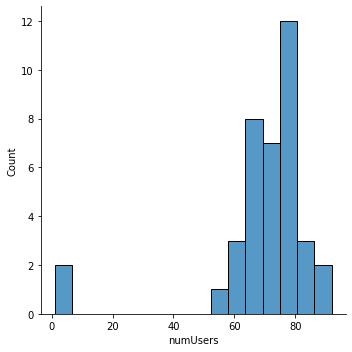

In [ ]:
# 아이템별 평가 개수 분포
sns.displot(item_statistics['numUsers'])

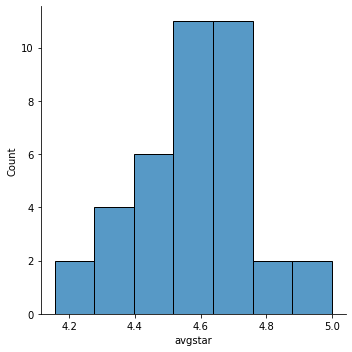

In [ ]:
# 아이템별 평균 평점의 분포
sns.displot(item_statistics['avgstar'])

- 모든 아이템의 평균 평점이 4.2~5.0 으로 몰려있다.

- 참고로 해당 평점은 우리가 구한 리뷰만으로 한 것이다.

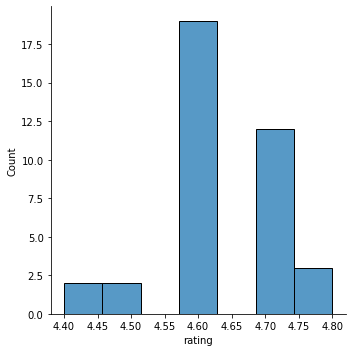

In [ ]:
# 아이템별 평균 평점의 분포 - 실제
sns.displot(item_statistics['rating'])

- 실제 평균 평점은 더 촘촘하고 평균 근처로 몰려있다.

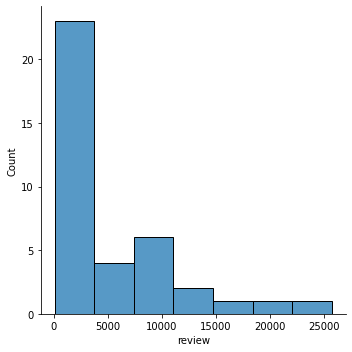

In [ ]:
# 아이템별 리뷰수의 분포 - 실제
sns.displot(item_statistics['review'])

In [ ]:
# 가장 많은 유저가 본 아이템 Top 10 - 실제
top10_df_real = item_statistics.sort_values(by='review', ascending=False)[:10]
top10_df_real

,상품명,numUsers,avgstar,stdstar,review,rating
8,[NEW] 롬앤 쥬시 래스팅 틴트,70,4.700000,0.528938,25698.0,4.7
15,[New] 페리페라 잉크더에어리벨벳 New color 추가,79,4.311111,0.894985,21971.0,4.6
31,페리페라 잉크더벨벳AD,76,4.611111,0.612500,15947.0,4.6
0,3CE 벨벳 립 틴트,76,4.600000,0.595866,14092.0,4.6
28,롬앤 제로 벨벳 틴트,69,4.477778,0.690673,12470.0,4.6
6,[NEW] 롬앤 블러 퍼지 틴트,66,4.566667,0.671239,10341.0,4.7
32,페리페라 잉크무드글로이틴트,66,4.500000,0.796763,9308.0,4.6
24,[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈),74,4.388889,0.979503,9129.0,4.6
19,[사나 PICK] 웨이크메이크 워터 블러링 픽싱 틴트 12color,78,4.705556,0.525306,8901.0,4.6
7,[NEW] 롬앤 제로 매트 립스틱,68,4.588889,0.701434,8879.0,4.6


In [ ]:
# 평점과 리뷰수를 모두 고려한 스코어
# score = log(numUsers) * (avgstar) ^ alpha

alpha = 0.8

item_statistics['score'] = np.log(item_statistics['numUsers']) * np.power( item_statistics['numUsers'], alpha)
top10_df = item_statistics.sort_values(by='score', ascending=False)[:10]
pd.merge(top10_df, movies_df[['상품명', 'item_title', 'release_date']], how='inner', on='상품명')

,movie_id,numUsers,avgRating,stdRating,steamRating,score,movie_title,release_date
0,50,583,4.358491,0.881341,4.158731,1038.844786,Star Wars (1977),01-Jan-1977
1,258,509,3.803536,0.994427,3.680452,912.079912,Contact (1997),11-Jul-1997
2,100,508,4.155512,0.975756,3.978408,910.358763,Fargo (1996),14-Feb-1997
3,181,507,4.007890,0.923955,3.853320,908.637389,Return of the Jedi (1983),14-Mar-1997
4,294,485,3.156701,1.098544,3.132346,870.709591,Liar Liar (1997),21-Mar-1997
5,286,481,3.656965,1.169401,3.554603,863.801621,"English Patient, The (1996)",15-Nov-1996
6,288,478,3.441423,1.113910,3.372515,858.618182,Scream (1996),20-Dec-1996
7,1,452,3.878319,0.927897,3.738882,813.604995,Toy Story (1995),01-Jan-1995
8,300,431,3.631090,0.998072,3.529457,777.126933,Air Force One (1997),01-Jan-1997
9,121,429,3.438228,1.116584,3.367556,773.647019,Independence Day (ID4) (1996),03-Jul-1996


## 3. 기존 고객 - 협업 필터링

# *3.* 협업필터링

## 중간고사 기준

### 1. 평균 평점 이용하기

In [ ]:
item_user_rating = df.pivot_table('star', index = '상품명', columns='user_id') # 아이템기반 협업 필터링
user_item_rating = df.pivot_table('star', index = 'user_id', columns='상품명') # 유저기반 협업필터링

In [ ]:
user_item_rating # 유저 베이스 추천 =>cold-stop problem (대부분 null) => 유사한 유저 찾기가 어려움

In [ ]:
item_user_rating.head() # 유저 베이스 추천이 어려워서 콘텐츠 기반 추천을 이용하는 경우가 많음

In [ ]:
user_item_rating.isnull().sum()

상품명
3CE 벨벳 립 틴트                                      1501
3CE 소프트 매트 립스틱                                   1501
MAC 맥 파우더 키스 리퀴드 립컬러                             1507
[NEW COLOR]클리오 쉬폰블러틴트                            1508
[NEW 컬러] 3CE 블러 워터 틴트                            1501
[NEW] 롬앤 듀이풀 워터 틴트                               1507
[NEW] 롬앤 블러 퍼지 틴트                                1511
[NEW] 롬앤 제로 매트 립스틱                               1509
[NEW] 롬앤 쥬시 래스팅 틴트                               1507
[NEW] 무지개맨션 오브제 리퀴드                              1509
[NEW] 어뮤즈 듀 밤 (핑크 스퀘어 미러 증정)                     1492
[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors                1497
[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color                 1502
[NEW] 클리오 쉬폰무드립                                  1491
[NEW] 페리페라 잉크무드 매트스틱 (도토리컬렉션 NEW COLOR)          1493
[New] 페리페라 잉크더에어리벨벳 New color 추가                 1498
[단독기획] 에스쁘아 노웨어 글로우 립밤                           1485
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    1499
[민스코PICK] 에뛰드 픽싱 틴트 바   

- null 값이 엄청 많은 것을 확인할 수 있다.

### 잠재요인 보정: 0으로 채우기

#### item-user matrix - 일반 score

In [ ]:
item_user_rating.fillna(0, inplace = True) # NaN을 0으로 줌 => 계산하기 위해 일단 0으로 채움
item_user_rating.head(5)

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3CE 소프트 매트 립스틱,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
MAC 맥 파우더 키스 리퀴드 립컬러,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW COLOR]클리오 쉬폰블러틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW 컬러] 3CE 블러 워터 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_based_collabor = cosine_similarity(item_user_rating)
item_based_collabor

array([[1.        , 0.12960887, 0.11677265, ..., 0.09090397, 0.07201912,
        0.10545249],
       [0.12960887, 1.        , 0.07589381, ..., 0.08736065, 0.08495504,
        0.08930909],
       [0.11677265, 0.07589381, 1.        , ..., 0.05405274, 0.02937287,
        0.04620599],
       ...,
       [0.09090397, 0.08736065, 0.05405274, ..., 1.        , 0.04862249,
        0.0685109 ],
       [0.07201912, 0.08495504, 0.02937287, ..., 0.04862249, 1.        ,
        0.0985817 ],
       [0.10545249, 0.08930909, 0.04620599, ..., 0.0685109 , 0.0985817 ,
        1.        ]])

In [ ]:
print(item_user_rating.shape)
print(item_based_collabor.shape)

(38, 1577)
(38, 38)


In [ ]:
item_based_collabor = pd.DataFrame(data = item_based_collabor, index = item_user_rating.index, columns = item_user_rating.index)

In [ ]:
item_based_collabor.head()

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,1.000000,0.129609,0.116773,0.042407,0.128193,0.084603,0.059207,0.046887,0.097138,0.041612,...,0.150445,0.000000,0.123726,0.098442,0.054118,0.123411,0.030784,0.090904,0.072019,0.105452
3CE 소프트 매트 립스틱,0.129609,1.000000,0.075894,0.084908,0.131769,0.066683,0.044154,0.071011,0.069464,0.072248,...,0.069002,0.000000,0.000000,0.058055,0.061249,0.190116,0.036322,0.087361,0.084955,0.089309
MAC 맥 파우더 키스 리퀴드 립컬러,0.116773,0.075894,1.000000,0.032795,0.080965,0.031502,0.023034,0.066344,0.059298,0.044261,...,0.088227,0.000000,0.000000,0.047693,0.012160,0.066239,0.029197,0.054053,0.029373,0.046206
[NEW COLOR]클리오 쉬폰블러틴트,0.042407,0.084908,0.032795,1.000000,0.049901,0.119189,0.083936,0.047578,0.088617,0.069528,...,0.045900,0.131828,0.131828,0.065148,0.076882,0.056914,0.027849,0.058145,0.056423,0.091682
[NEW 컬러] 3CE 블러 워터 틴트,0.128193,0.131769,0.080965,0.049901,1.000000,0.102257,0.061387,0.047491,0.116747,0.072657,...,0.122336,0.000000,0.000000,0.112865,0.068647,0.102794,0.039984,0.126008,0.086408,0.130725


In [ ]:
def get_item_based_collabor(title):
    return item_based_collabor[title].sort_values(ascending=False)[1:11]

In [ ]:
get_item_based_collabor('3CE 소프트 매트 립스틱')

상품명
포렌코즈 타투 끌레르 벨벳 틴트                                0.190116
[NEW 컬러] 3CE 블러 워터 틴트                            0.131769
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    0.130447
3CE 벨벳 립 틴트                                      0.129609
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                0.108922
데이지크 워터 블러 틴트 4.5g 5종 택 1                        0.102020
[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈)                    0.098511
[민스코PICK] 에뛰드 픽싱 틴트 바                            0.095391
[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)                0.092274
힌스 무드인핸서 워터 리퀴드 글로우                              0.089309
Name: 3CE 소프트 매트 립스틱, dtype: float64

#### item-user matrix - 지속력 score

In [ ]:
item_user_rating2 = df.pivot_table('지속력', index = '상품명', columns='user_id') # 아이템기반 협업 필터링
user_item_rating2 = df.pivot_table('지속력', index = 'user_id', columns='상품명') # 유저기반 협업필터링

In [ ]:
user_item_rating2 # 유저 베이스 추천 =>cold-stop problem (대부분 null) => 유사한 유저 찾기가 어려움

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
user_id,,,,,,,,,,,,,,,,,,,,,
018301,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
02****,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
0326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
0live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
17호빋베브봄,NaN,NaN,NaN,NaN,NaN,2.0,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히드돈이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히쟝,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히치,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_user_rating2.head() # 유저 베이스 추천이 어려워서 콘텐츠 기반 추천을 이용하는 경우가 많음

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3CE 소프트 매트 립스틱,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,2.5,NaN,NaN,NaN,2.0,NaN,NaN,NaN
MAC 맥 파우더 키스 리퀴드 립컬러,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW COLOR]클리오 쉬폰블러틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW 컬러] 3CE 블러 워터 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_user_rating2.fillna(0, inplace = True) # NaN을 0으로 줌 => 계산하기 위해 일단 0으로 채움
item_user_rating1.head(5)

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3CE 소프트 매트 립스틱,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
MAC 맥 파우더 키스 리퀴드 립컬러,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW COLOR]클리오 쉬폰블러틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW 컬러] 3CE 블러 워터 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_based_collabor2 = cosine_similarity(item_user_rating2)
item_based_collabor2

array([[1.        , 0.13824355, 0.08641803, ..., 0.08932853, 0.07868622,
        0.11713527],
       [0.13824355, 1.        , 0.09392257, ..., 0.08946181, 0.06675975,
        0.09112286],
       [0.08641803, 0.09392257, 1.        , ..., 0.06169972, 0.03612119,
        0.05267259],
       ...,
       [0.08932853, 0.08946181, 0.06169972, ..., 1.        , 0.04745867,
        0.06044235],
       [0.07868622, 0.06675975, 0.03612119, ..., 0.04745867, 1.        ,
        0.09088634],
       [0.11713527, 0.09112286, 0.05267259, ..., 0.06044235, 0.09088634,
        1.        ]])

In [ ]:
print(item_user_rating2.shape)
print(item_based_collabor2.shape)

(38, 1577)
(38, 38)


In [ ]:
item_based_collabor2 = pd.DataFrame(data = item_based_collabor2, index = item_user_rating2.index, columns = item_user_rating2.index)

In [ ]:
item_based_collabor2.head()

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,1.000000,0.138244,0.086418,0.032343,0.118370,0.065359,0.047247,0.053024,0.067637,0.053679,...,0.123240,0.000000,0.103730,0.079184,0.064674,0.095671,0.026253,0.089329,0.078686,0.117135
3CE 소프트 매트 립스틱,0.138244,1.000000,0.093923,0.061986,0.129550,0.063360,0.033400,0.076537,0.065028,0.061619,...,0.056077,0.000000,0.000000,0.041738,0.063407,0.195507,0.022418,0.089462,0.066760,0.091123
MAC 맥 파우더 키스 리퀴드 립컬러,0.086418,0.093923,1.000000,0.037744,0.098208,0.027636,0.029485,0.065810,0.058752,0.047458,...,0.078382,0.000000,0.000000,0.050318,0.017154,0.065658,0.030464,0.061700,0.036121,0.052673
[NEW COLOR]클리오 쉬폰블러틴트,0.032343,0.061986,0.037744,1.000000,0.054186,0.122318,0.073514,0.051002,0.081974,0.075218,...,0.041127,0.099775,0.124719,0.080397,0.077760,0.067956,0.011364,0.049326,0.056765,0.097129
[NEW 컬러] 3CE 블러 워터 틴트,0.118370,0.129550,0.098208,0.054186,1.000000,0.093011,0.051650,0.055437,0.121572,0.065073,...,0.122086,0.000000,0.000000,0.107990,0.070501,0.089104,0.025488,0.110124,0.078070,0.135566


In [ ]:
def get_item_based_collabor(title):
    return item_based_collabor2[title].sort_values(ascending=False)[1:11]

In [ ]:
get_item_based_collabor('3CE 소프트 매트 립스틱')

상품명
포렌코즈 타투 끌레르 벨벳 틴트                                0.195507
3CE 벨벳 립 틴트                                      0.138244
[NEW 컬러] 3CE 블러 워터 틴트                            0.129550
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                0.126382
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    0.114139
MAC 맥 파우더 키스 리퀴드 립컬러                             0.093923
힌스 무드인핸서 워터 리퀴드 글로우                              0.091123
헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정)       0.089462
[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)                0.084306
[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈)                    0.078734
Name: 3CE 소프트 매트 립스틱, dtype: float64

#### item-user matrix - 수분감 score

In [ ]:
item_user_rating4 = df.pivot_table('수분감', index = '상품명', columns='user_id') # 아이템기반 협업 필터링
user_item_rating4 = df.pivot_table('수분감', index = 'user_id', columns='상품명') # 유저기반 협업필터링

In [ ]:
user_item_rating4 # 유저 베이스 추천 =>cold-stop problem (대부분 null) => 유사한 유저 찾기가 어려움

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
user_id,,,,,,,,,,,,,,,,,,,,,
018301,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
02****,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
0326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
0live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
17호빋베브봄,NaN,NaN,NaN,NaN,NaN,2.75,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히드돈이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히쟝,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히치,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_user_rating4.head() # 유저 베이스 추천이 어려워서 콘텐츠 기반 추천을 이용하는 경우가 많음

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3CE 소프트 매트 립스틱,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.5,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
MAC 맥 파우더 키스 리퀴드 립컬러,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW COLOR]클리오 쉬폰블러틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW 컬러] 3CE 블러 워터 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_user_rating4.fillna(0, inplace = True) # NaN을 0으로 줌 => 계산하기 위해 일단 0으로 채움
item_user_rating4.head(5)

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3CE 소프트 매트 립스틱,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
MAC 맥 파우더 키스 리퀴드 립컬러,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW COLOR]클리오 쉬폰블러틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW 컬러] 3CE 블러 워터 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_based_collabor4 = cosine_similarity(item_user_rating4)
item_based_collabor4

array([[1.        , 0.12789606, 0.1022499 , ..., 0.07116079, 0.05936603,
        0.09939256],
       [0.12789606, 1.        , 0.07270835, ..., 0.08060438, 0.06887782,
        0.08529659],
       [0.1022499 , 0.07270835, 1.        , ..., 0.04281445, 0.02198033,
        0.04134343],
       ...,
       [0.07116079, 0.08060438, 0.04281445, ..., 1.        , 0.02244363,
        0.06202999],
       [0.05936603, 0.06887782, 0.02198033, ..., 0.02244363, 1.        ,
        0.07662779],
       [0.09939256, 0.08529659, 0.04134343, ..., 0.06202999, 0.07662779,
        1.        ]])

In [ ]:
print(item_user_rating4.shape)
print(item_based_collabor4.shape)

(38, 1577)
(38, 38)


In [ ]:
item_based_collabor4 = pd.DataFrame(data = item_based_collabor4, index = item_user_rating4.index, columns = item_user_rating4.index)

In [ ]:
item_based_collabor4.head()

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,1.000000,0.127896,0.102250,0.034517,0.123077,0.077427,0.070268,0.038680,0.082285,0.038420,...,0.095844,0.000000,0.110839,0.074973,0.047038,0.100885,0.032802,0.071161,0.059366,0.099393
3CE 소프트 매트 립스틱,0.127896,1.000000,0.072708,0.067906,0.123858,0.076931,0.072001,0.073278,0.090962,0.052789,...,0.075947,0.000000,0.000000,0.061370,0.052439,0.147611,0.060231,0.080604,0.068878,0.085297
MAC 맥 파우더 키스 리퀴드 립컬러,0.102250,0.072708,1.000000,0.017853,0.074137,0.029174,0.034351,0.098260,0.056580,0.066044,...,0.069679,0.000000,0.000000,0.038390,0.016980,0.057435,0.021051,0.042814,0.021980,0.041343
[NEW COLOR]클리오 쉬폰블러틴트,0.034517,0.067906,0.017853,1.000000,0.051975,0.102466,0.079880,0.026692,0.089694,0.075750,...,0.046652,0.131122,0.163903,0.037741,0.082077,0.038499,0.017462,0.030293,0.037816,0.092903
[NEW 컬러] 3CE 블러 워터 틴트,0.123077,0.123858,0.074137,0.051975,1.000000,0.103776,0.077989,0.033920,0.109881,0.060164,...,0.109330,0.000000,0.000000,0.111734,0.062647,0.109160,0.037755,0.104242,0.067578,0.133566


In [ ]:
def get_item_based_collabor(title):
    return item_based_collabor4[title].sort_values(ascending=False)[1:11]

In [ ]:
get_item_based_collabor('3CE 소프트 매트 립스틱')

상품명
포렌코즈 타투 끌레르 벨벳 틴트                                0.147611
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    0.132106
3CE 벨벳 립 틴트                                      0.127896
[NEW 컬러] 3CE 블러 워터 틴트                            0.123858
[민스코PICK] 에뛰드 픽싱 틴트 바                            0.120772
데이지크 워터 블러 틴트 4.5g 5종 택 1                        0.098920
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                0.095913
[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color                 0.090983
[NEW] 롬앤 쥬시 래스팅 틴트                               0.090962
[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈)                    0.089485
Name: 3CE 소프트 매트 립스틱, dtype: float64

기존:

상품명
포렌코즈 타투 끌레르 벨벳 틴트                                0.190116\
[NEW 컬러] 3CE 블러 워터 틴트                            0.131769\
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    0.130447\
3CE 벨벳 립 틴트                                      0.129609\
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                0.108922\
데이지크 워터 블러 틴트 4.5g 5종 택 1                        0.102020\
[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈)                    0.098511\
[민스코PICK] 에뛰드 픽싱 틴트 바                            0.095391\
[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)                0.092274\
힌스 무드인핸서 워터 리퀴드 글로우                              0.089309\

기존:

상품명
포렌코즈 타투 끌레르 벨벳 틴트                                0.190116\
[NEW 컬러] 3CE 블러 워터 틴트                            0.131769\
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    0.130447\
3CE 벨벳 립 틴트                                      0.129609\
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                0.108922\
데이지크 워터 블러 틴트 4.5g 5종 택 1                        0.102020\
[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈)                    0.098511\
[민스코PICK] 에뛰드 픽싱 틴트 바                            0.095391\
[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)                0.092274\
힌스 무드인핸서 워터 리퀴드 글로우                              0.089309\

#### item-user matrix - 발림성 score

In [ ]:
item_user_rating3 = df.pivot_table('발림성', index = '상품명', columns='user_id') # 아이템기반 협업 필터링
user_item_rating3 = df.pivot_table('발림성', index = 'user_id', columns='상품명') # 유저기반 협업필터링

In [ ]:
user_item_rating3 # 유저 베이스 추천 =>cold-stop problem (대부분 null) => 유사한 유저 찾기가 어려움

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
user_id,,,,,,,,,,,,,,,,,,,,,
018301,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
02****,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
0326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
0live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
17호빋베브봄,NaN,NaN,NaN,NaN,NaN,2.25,2.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히드돈이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히쟝,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히치,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_user_rating3.head() # 유저 베이스 추천이 어려워서 콘텐츠 기반 추천을 이용하는 경우가 많음

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3CE 소프트 매트 립스틱,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
MAC 맥 파우더 키스 리퀴드 립컬러,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW COLOR]클리오 쉬폰블러틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW 컬러] 3CE 블러 워터 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
get_item_based_collabor('3CE 소프트 매트 립스틱')

상품명
포렌코즈 타투 끌레르 벨벳 틴트                                0.195507
3CE 벨벳 립 틴트                                      0.138244
[NEW 컬러] 3CE 블러 워터 틴트                            0.129550
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                0.126382
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    0.114139
MAC 맥 파우더 키스 리퀴드 립컬러                             0.093923
힌스 무드인핸서 워터 리퀴드 글로우                              0.091123
헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정)       0.089462
[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)                0.084306
[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈)                    0.078734
Name: 3CE 소프트 매트 립스틱, dtype: float64

In [ ]:
def get_item_based_collabor(title):
    return item_based_collabor3[title].sort_values(ascending=False)[1:11]

In [ ]:
item_based_collabor3.head()

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,1.000000,0.138244,0.086418,0.032343,0.118370,0.065359,0.047247,0.053024,0.067637,0.053679,...,0.123240,0.000000,0.103730,0.079184,0.064674,0.095671,0.026253,0.089329,0.078686,0.117135
3CE 소프트 매트 립스틱,0.138244,1.000000,0.093923,0.061986,0.129550,0.063360,0.033400,0.076537,0.065028,0.061619,...,0.056077,0.000000,0.000000,0.041738,0.063407,0.195507,0.022418,0.089462,0.066760,0.091123
MAC 맥 파우더 키스 리퀴드 립컬러,0.086418,0.093923,1.000000,0.037744,0.098208,0.027636,0.029485,0.065810,0.058752,0.047458,...,0.078382,0.000000,0.000000,0.050318,0.017154,0.065658,0.030464,0.061700,0.036121,0.052673
[NEW COLOR]클리오 쉬폰블러틴트,0.032343,0.061986,0.037744,1.000000,0.054186,0.122318,0.073514,0.051002,0.081974,0.075218,...,0.041127,0.099775,0.124719,0.080397,0.077760,0.067956,0.011364,0.049326,0.056765,0.097129
[NEW 컬러] 3CE 블러 워터 틴트,0.118370,0.129550,0.098208,0.054186,1.000000,0.093011,0.051650,0.055437,0.121572,0.065073,...,0.122086,0.000000,0.000000,0.107990,0.070501,0.089104,0.025488,0.110124,0.078070,0.135566


In [ ]:
item_user_rating3.fillna(0, inplace = True) # NaN을 0으로 줌 => 계산하기 위해 일단 0으로 채움
item_user_rating3.head(5)

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3CE 소프트 매트 립스틱,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
MAC 맥 파우더 키스 리퀴드 립컬러,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW COLOR]클리오 쉬폰블러틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW 컬러] 3CE 블러 워터 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_based_collabor3 = cosine_similarity(item_user_rating3)
item_based_collabor3

array([[1.        , 0.13824355, 0.08641803, ..., 0.08932853, 0.07868622,
        0.11713527],
       [0.13824355, 1.        , 0.09392257, ..., 0.08946181, 0.06675975,
        0.09112286],
       [0.08641803, 0.09392257, 1.        , ..., 0.06169972, 0.03612119,
        0.05267259],
       ...,
       [0.08932853, 0.08946181, 0.06169972, ..., 1.        , 0.04745867,
        0.06044235],
       [0.07868622, 0.06675975, 0.03612119, ..., 0.04745867, 1.        ,
        0.09088634],
       [0.11713527, 0.09112286, 0.05267259, ..., 0.06044235, 0.09088634,
        1.        ]])

In [ ]:
print(item_user_rating3.shape)
print(item_based_collabor3.shape)

(38, 1577)
(38, 38)


In [ ]:
item_based_collabor3 = pd.DataFrame(data = item_based_collabor3, index = item_user_rating3.index, columns = item_user_rating3.index)

#### item-user matrix - 발색력 score

In [ ]:
item_user_rating1 = df.pivot_table('발색력', index = '상품명', columns='user_id') # 아이템기반 협업 필터링
user_item_rating1 = df.pivot_table('발색력', index = 'user_id', columns='상품명') # 유저기반 협업필터링

In [ ]:
user_item_rating1 # 유저 베이스 추천 =>cold-stop problem (대부분 null) => 유사한 유저 찾기가 어려움

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
user_id,,,,,,,,,,,,,,,,,,,,,
018301,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
02****,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
0326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
0live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
17호빋베브봄,NaN,NaN,NaN,NaN,NaN,2.75,2.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히드돈이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히쟝,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
히치,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_user_rating1.head() # 유저 베이스 추천이 어려워서 콘텐츠 기반 추천을 이용하는 경우가 많음

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3CE 소프트 매트 립스틱,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
MAC 맥 파우더 키스 리퀴드 립컬러,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW COLOR]클리오 쉬폰블러틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW 컬러] 3CE 블러 워터 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_user_rating1.fillna(0, inplace = True) # NaN을 0으로 줌 => 계산하기 위해 일단 0으로 채움
item_user_rating1.head(5)

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3CE 소프트 매트 립스틱,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
MAC 맥 파우더 키스 리퀴드 립컬러,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW COLOR]클리오 쉬폰블러틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[NEW 컬러] 3CE 블러 워터 틴트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_based_collabor1 = cosine_similarity(item_user_rating1)
item_based_collabor1

array([[1.        , 0.13397227, 0.10437367, ..., 0.10924586, 0.08183548,
        0.12215117],
       [0.13397227, 1.        , 0.0894236 , ..., 0.09075269, 0.08563414,
        0.0900976 ],
       [0.10437367, 0.0894236 , 1.        , ..., 0.05381043, 0.03036679,
        0.03697748],
       ...,
       [0.10924586, 0.09075269, 0.05381043, ..., 1.        , 0.05297387,
        0.0760511 ],
       [0.08183548, 0.08563414, 0.03036679, ..., 0.05297387, 1.        ,
        0.09927984],
       [0.12215117, 0.0900976 , 0.03697748, ..., 0.0760511 , 0.09927984,
        1.        ]])

In [ ]:
print(item_user_rating1.shape)
print(item_based_collabor1.shape)

(38, 1577)
(38, 38)


In [ ]:
item_based_collabor1 = pd.DataFrame(data = item_based_collabor1, index = item_user_rating1.index, columns = item_user_rating1.index)

In [ ]:
item_based_collabor1.head()

상품명,3CE 벨벳 립 틴트,3CE 소프트 매트 립스틱,MAC 맥 파우더 키스 리퀴드 립컬러,[NEW COLOR]클리오 쉬폰블러틴트,[NEW 컬러] 3CE 블러 워터 틴트,[NEW] 롬앤 듀이풀 워터 틴트,[NEW] 롬앤 블러 퍼지 틴트,[NEW] 롬앤 제로 매트 립스틱,[NEW] 롬앤 쥬시 래스팅 틴트,[NEW] 무지개맨션 오브제 리퀴드,...,롬앤 제로 벨벳 틴트,바비 브라운 엑스트라 립 틴트,오브제 무드체인지 립밤 3g,페리페라 잉크더벨벳AD,페리페라 잉크무드글로이틴트,포렌코즈 타투 끌레르 벨벳 틴트,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정),힌스 무드 인핸서 마뜨,힌스 무드인핸서 워터 리퀴드 글로우
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,1.000000,0.133972,0.104374,0.048088,0.137377,0.090360,0.073778,0.057690,0.097375,0.051240,...,0.134883,0.000000,0.120273,0.079349,0.057742,0.123868,0.035792,0.109246,0.081835,0.122151
3CE 소프트 매트 립스틱,0.133972,1.000000,0.089424,0.080975,0.122654,0.080554,0.037270,0.070958,0.067313,0.062646,...,0.064282,0.000000,0.000000,0.055875,0.044727,0.192728,0.039449,0.090753,0.085634,0.090098
MAC 맥 파우더 키스 리퀴드 립컬러,0.104374,0.089424,1.000000,0.031459,0.083505,0.027613,0.026160,0.057334,0.062123,0.042949,...,0.089316,0.000000,0.000000,0.044969,0.014999,0.067781,0.028736,0.053810,0.030367,0.036977
[NEW COLOR]클리오 쉬폰블러틴트,0.048088,0.080975,0.031459,1.000000,0.061656,0.116816,0.095136,0.050030,0.096543,0.068708,...,0.042301,0.133275,0.133275,0.066611,0.086379,0.051243,0.032450,0.054699,0.071250,0.102597
[NEW 컬러] 3CE 블러 워터 틴트,0.137377,0.122654,0.083505,0.061656,1.000000,0.099128,0.066339,0.060519,0.101701,0.064895,...,0.103230,0.000000,0.000000,0.116031,0.054516,0.095291,0.039823,0.131156,0.085848,0.131095


In [ ]:
def get_item_based_collabor(title):
    return item_based_collabor1[title].sort_values(ascending=False)[1:11]

In [ ]:
get_item_based_collabor('3CE 소프트 매트 립스틱')

상품명
포렌코즈 타투 끌레르 벨벳 틴트                                0.192728
3CE 벨벳 립 틴트                                      0.133972
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)    0.130317
[NEW 컬러] 3CE 블러 워터 틴트                            0.122654
[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈)                    0.118319
데이지크 워터 블러 틴트 4.5g 5종 택 1                        0.106071
[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)                0.103060
[민스코PICK] 에뛰드 픽싱 틴트 바                            0.100678
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                0.099617
헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정)       0.090753
Name: 3CE 소프트 매트 립스틱, dtype: float64

### 잠재요인 보정 : 행렬분해

**<모델 설명>**

 - memory based approach model 로도 불림. 
 - (이유) user matrix(6*2) , item matrix (2*6) 의 연관관계를 보고자 할 때, 각 행렬의 3차원의 벡터 정점들을 두 행렬을 곱함으로써, (X * Y) 라는 하나의 matrix에 2차원으로 축약하여 dimensionality 가 낮아진 것.   

- 왼쪽 m(user matrix) 의 칼럼 2개가 latent factors(an indication of hidden characteristics about the users) 위에 있는 n(item matrix)도 마찬가지. 
- 예를 들어, m(2, -1)에서 2가 호러영화, -1이 로맨스영화에 대한 평점이고, n(2.5, 1) 의 2.5는 호러무비일 가능성, 1은 로맨스영화일 가능성이라고 가정할 때, 두 벡터를 곱한 4(호러무비에 대한)는 평점이 5점일 수도 있었지만, 로맨스에 대한 잠재적 선호도 때문에 4가 매겨진 것으로 분석할 수 있음. 

- 하지만 현실에서는 latent factor가 genre뿐 아니라 더 복잡하게 얽혀 있음. (그래서 이 부분을 해결하기 위해 autoencoder등을 활용하기도 하는 듯) 

- latent factor 를 활용하면 더 개인화된 추천을 할 수도 있지만, 너무 factor가 많으면 오버피팅문제가 발생한다고 함. 

- Algorithms for Matrix Factorization :  
 - (1) svd(singular value decomposition) : Netflix prize competition 에서 좋은 성과를 보여 유명해짐. 
 - (2) PCA, 그리고 pca변형모델 NMF
 - (3) autoencoders 


In [ ]:
# 유저 아이템 매트릭스부터 NULL값 보정
R=np.array(item_user_rating)

In [ ]:
num_users, num_items = R.shape
K=10 # 임의 설정 (잠재요인 개수)

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K)) # 랜덤값 정규화 시킴 (정규분포 따르게 함)
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [ ]:
# RMSE 사용해서 성능평가
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T (전치) 의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros] # 기존 NULL 이 아닌 실제값들과 에측값 비교하기
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [ ]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장. 
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps= 1000000
learning_rate=0.01 #하이퍼 파라미터
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용 (과적합 방지)
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse) # 중간 STOP 조건



### iteration step :  0  rmse :  4.6142593001103505
### iteration step :  50  rmse :  0.1300802966050583
### iteration step :  100  rmse :  0.08326887923914762
### iteration step :  150  rmse :  0.06588337390625983
### iteration step :  200  rmse :  0.055608526471536406
### iteration step :  250  rmse :  0.048885418565555123
### iteration step :  300  rmse :  0.04421044619912116
### iteration step :  350  rmse :  0.04082556167702421
### iteration step :  400  rmse :  0.038288605163744716
### iteration step :  450  rmse :  0.03632529385077202
### iteration step :  500  rmse :  0.034762096687310014
### iteration step :  550  rmse :  0.033487049163147514
### iteration step :  600  rmse :  0.03242594629331987
### iteration step :  650  rmse :  0.03152808014465531
### iteration step :  700  rmse :  0.030757725712612486
### iteration step :  750  rmse :  0.030088995052547602
### iteration step :  800  rmse :  0.029502655397058517
### iteration step :  850  rmse :  0.028984106125434686
### it

In [ ]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.793 5.011 3.473 ... 4.597 5.283 4.025]
 [2.372 2.495 1.272 ... 3.573 2.445 3.464]
 [5.133 5.26  5.517 ... 4.507 4.739 4.752]
 ...
 [3.367 4.312 3.47  ... 4.268 4.408 3.661]
 [3.855 2.969 2.959 ... 3.816 3.166 3.334]
 [2.324 2.288 1.278 ... 3.472 2.215 3.467]]


In [ ]:
pd.DataFrame(pred_matrix)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,3.792988,5.010841,3.472793,4.055558,4.725077,5.274788,4.988326,4.055242,4.495810,4.415242,...,4.925046,4.306724,3.610212,4.987864,4.924230,3.680594,3.855069,4.597176,5.282856,4.024712
1,2.371549,2.494605,1.272084,3.283375,3.093724,2.899332,3.259113,2.376468,3.482204,2.824849,...,2.720437,3.725767,2.729394,2.016728,3.203611,3.265680,4.989819,3.572646,2.444820,3.464034
2,5.132699,5.260491,5.517120,4.674208,4.120654,4.620175,3.618817,5.907064,3.402884,5.219244,...,4.548334,3.914400,4.088110,4.518921,4.053155,4.321240,3.381162,4.507197,4.739131,4.752196
3,2.574697,2.554326,1.562918,3.325992,3.181913,2.959274,3.193574,2.611463,3.464504,2.920079,...,2.789538,3.713521,2.802084,2.064665,3.160988,3.382950,4.989883,3.622195,2.508098,3.559862
4,3.253588,5.019284,3.152896,4.634699,4.156700,4.750836,4.712138,4.778773,4.061737,5.089400,...,4.325866,4.600711,4.117114,4.178188,4.975543,4.078461,4.149030,5.059514,4.758144,4.707459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,3.664111,3.657110,3.394714,3.588881,3.828161,4.243125,3.118049,4.336158,4.501482,4.109222,...,3.456720,3.051026,4.396499,3.711978,4.040286,4.787766,3.537398,4.566987,3.782050,4.479554
1573,3.195592,4.990177,3.713158,4.416259,2.394911,3.733617,3.242633,3.721665,3.243238,3.380001,...,3.330131,4.168814,3.277807,4.161331,3.569657,3.347776,2.792872,4.090228,3.890161,4.285019
1574,3.366952,4.311819,3.469608,3.834299,3.446277,3.848121,3.705683,4.237224,3.955654,4.270138,...,4.194250,3.368344,3.917118,3.970051,4.090674,3.860955,3.059323,4.267592,4.408349,3.660868
1575,3.854851,2.969111,2.958908,3.032858,3.396085,3.627867,3.022167,3.066524,3.873518,2.757547,...,3.358469,2.940298,3.448905,3.221670,3.570454,3.749447,3.543810,3.815731,3.165682,3.333923


In [ ]:
item_user_rating

user_id,018301,02****,0326,0live,17호빋베브봄,2가좋은래빗,30대건성쿨톤녀,4라4,A21,AllMyLove,...,흭이,흰두부,힁오몽,히hi,히뇽,히드돈이,히쟝,히치,히히홍,힙또리
상품명,,,,,,,,,,,,,,,,,,,,,
3CE 벨벳 립 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3CE 소프트 매트 립스틱,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.5,5.000000,NaN,NaN,NaN,5.0,NaN,NaN,NaN
MAC 맥 파우더 키스 리퀴드 립컬러,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW COLOR]클리오 쉬폰블러틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW 컬러] 3CE 블러 워터 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW] 롬앤 듀이풀 워터 틴트,NaN,NaN,NaN,NaN,4.75,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW] 롬앤 블러 퍼지 틴트,5.0,NaN,NaN,NaN,4.75,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW] 롬앤 제로 매트 립스틱,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[NEW] 롬앤 쥬시 래스팅 틴트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 잠재요인 보정: suprise 패키지 사용

In [3]:
data_path='/content/drive/MyDrive/[2022-2]캡스톤디자인/project/' # 기말고사도 여기만
df=pd.read_csv(data_path+'df_sum.csv')

In [4]:
df=df.drop('Unnamed: 0', axis=1)

In [5]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import surprise 

print(surprise.__version__)

1.1.3


In [7]:
from surprise import SVD
from surprise import Reader,Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

In [194]:
df.columns

Index(['index', 'user_id', '상품명', 'item_option', 'user_rank', 'star',
       'write_date', '발색력', '지속력', '발림성', '수분감', '올리브영 후기 유무', '광고 유무',
       'user_type1', 'user_type3', 'user_type4', '탑리뷰어', 'user_type2',
       'user_type5', 'item_no', 'user_no', 'rating', '브랜드', '가격', '평균별점',
       '발색력점수', '지속력점수', '발림성점수', '수분감점수'],
      dtype='object')

In [ ]:
df_total=df[['user_no', '상품명', 'star']]
df_total

,user_no,상품명,star
0,1599,[NEW] 무지개맨션 오브제 리퀴드,4.0
1,637,[NEW] 무지개맨션 오브제 리퀴드,4.0
2,1599,[NEW] 무지개맨션 오브제 리퀴드,4.0
3,1362,[NEW] 무지개맨션 오브제 리퀴드,4.0
4,1722,[NEW] 무지개맨션 오브제 리퀴드,5.0
...,...,...,...
4024,1783,MAC 맥 파우더 키스 리퀴드 립컬러,4.0
4025,735,MAC 맥 파우더 키스 리퀴드 립컬러,5.0
4026,605,MAC 맥 파우더 키스 리퀴드 립컬러,3.0
4027,748,MAC 맥 파우더 키스 리퀴드 립컬러,3.0


In [ ]:
df_total=df_total.dropna()
df_total.head()

,user_no,상품명,star
0,1599,[NEW] 무지개맨션 오브제 리퀴드,4.0
1,637,[NEW] 무지개맨션 오브제 리퀴드,4.0
2,1599,[NEW] 무지개맨션 오브제 리퀴드,4.0
3,1362,[NEW] 무지개맨션 오브제 리퀴드,4.0
4,1722,[NEW] 무지개맨션 오브제 리퀴드,5.0


In [ ]:
# ratings_noh.csv 파일로 언로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성.
df_total.to_csv(data_path+'Item-Ratings_noh.csv', index=False, header=False)

In [ ]:
from surprise.model_selection import cross_validate 

In [ ]:
df_total2=df[['user_no', 'item_no', 'star']]
df_total2=df_total2.dropna()

boughter = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df_total2[['user_no', 'item_no', 'star']], boughter)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8421  0.7573  0.7533  0.8063  0.7672  0.7852  0.0340  
MAE (testset)     0.6008  0.5745  0.5661  0.5993  0.5862  0.5854  0.0136  
Fit time          0.04    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.01    0.00    0.00    0.01    0.00    0.01    0.00    


{'test_rmse': array([0.84205114, 0.75731803, 0.75334368, 0.80633196, 0.767158  ]),
 'test_mae': array([0.60084141, 0.57452795, 0.56613103, 0.59933925, 0.58616746]),
 'fit_time': (0.03676462173461914,
  0.03708672523498535,
  0.03810524940490723,
  0.03721261024475098,
  0.04239010810852051),
 'test_time': (0.00613856315612793,
  0.004203319549560547,
  0.0037572383880615234,
  0.009662151336669922,
  0.00406956672668457)}

In [ ]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [20, 40, 60, 80, 100], 'n_factors': [20, 50, 100, 150, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


0.7883080338060248
{'n_epochs': 20, 'n_factors': 20}


In [ ]:
col = 'user item rating'
boughter = Reader(line_format=col, sep=',', rating_scale=(1, 5)) # 파싱포맷 정의 (컬럼을 분리하는 분리자, 점수 폭)
data=Dataset.load_from_file(data_path+'Item-Ratings_noh.csv', boughter)

In [ ]:
# best로 확인하기
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행 시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=20, random_state=20)

# 학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.7611


0.7610512369048774

#### 개인화된 추천

In [ ]:
from surprise.dataset import DatasetAutoFolds

In [ ]:
col = 'user item rating' # 그냥 df로 불러오면 오류 발생
boughter = Reader(line_format=col, sep=',', rating_scale=(1, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file=data_path+'Item-Ratings_noh.csv', reader=boughter)

# 전체 데이터를 학습 데이터로 생성함. ( DatasetAutoFolds 객체를 생성하고 build_full_trainset() 메서드를 호출)
trainset = data_folds.build_full_trainset()

In [ ]:
algo = SVD(n_epochs=20, n_factors=20, random_state=0)
algo.fit(trainset) 

In [ ]:
df_total.상품명.value_counts()

[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color                 358
[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors                180
[사나 PICK] 웨이크메이크 워터 블러링 픽싱 틴트 12color            180
[NEW] 클리오 쉬폰무드립                                  180
[단독기획] 에스쁘아 노웨어 글로우 립밤                           180
[NEW] 페리페라 잉크무드 매트스틱 (도토리컬렉션 NEW COLOR)          180
롬앤 글래스팅 워터 글로스                                   179
[슬기 Pick] 어뮤즈 듀 벨벳 (핑크 스퀘어 미러 증정)                 91
헤라 센슈얼 스파이시 누드 글로스 5g / 4 color                   90
3CE 벨벳 립 틴트                                       90
[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)                 90
[NEW] 롬앤 쥬시 래스팅 틴트                                90
포렌코즈 타투 끌레르 벨벳 틴트                                 90
3CE 소프트 매트 립스틱                                    90
[먼지나방 Pick] 페리페라 잉크무드 매트틴트 (도토리컬렉션 NEW COLOR)     90
[민스코PICK] 에뛰드 픽싱 틴트 바                             90
[NEW COLOR]클리오 쉬폰블러틴트                             90
[NEW] 무지개맨션 오브제 리퀴드                               90
힌스 무드인핸서 워터 리퀴드 글로우                           

In [ ]:
# user_no=9 상품명 데이터를 추출해 상품명 '웨이크메이크어쩌구' 데이터가 있는지 확인.
items = df_total[df_total['user_no']==9]['상품명']

if items[items=='[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color'].count() ==0 :
  print('9번 사용자는 상품명 [NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color의 평점 없음')

9번 사용자는 상품명 [NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color의 평점 없음


In [ ]:
# 아이템에 대한 상세 속성 정보 DataFrame 로딩
items_str=df[['상품명', 'item_no', '브랜드', '가격', '평가', '리뷰수', '평균별점']]
items_str=items_str.drop_duplicates()

print(items_str[items_str['상품명']=='[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color'])

                                   상품명  item_no     브랜드     가격  평가  리뷰수  평균별점
2950  [NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color       15  웨이크메이크  10900  최고  933   4.4


In [ ]:
# 결과 확인
uid = str(9)
iid = str('[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color')

pred = algo.predict(uid, iid, verbose=True) # 추천 예측 평점은 est 

user: 9          item: [NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color r_ui = None   est = 4.40   {'was_impossible': False}


In [ ]:
# 사용자가 평점을 매기지 않은 전체 아이템을 추출한 후 예측 평점 순으로 아이템를 추천
def get_unbought_surprise(df_total, items_str, user_no):
  # 입력값으로 들어온 user_no에 해당하는 사용자가 평점을 매긴 모든 아이템를 리스트로 생성
  bought_items = df_total[df_total['user_no']==user_no]['상품명'].tolist()

  # 모든 아이템의 상품명를 리스트로 생성.
  total_items =items_str['상품명'].tolist()

  # 모든 아이템의 상품명 중 이미 평점을 매긴 아이템의 상품명를 제외한 후 리스트로 생성
  unbought_items = [items_str for items_str in total_items if items_str not in bought_items]
  print('평점 매긴 아이템 수 : ', len(bought_items), '추천 대상 아이템 수 : ', len(unbought_items),
        '전체 아이템 수 : ', len(total_items))
  
  return unbought_items

unbought_items = get_unbought_surprise(df_total, items_str, 9)

평점 매긴 아이템 수 :  3 추천 대상 아이템 수 :  35 전체 아이템 수 :  38


In [ ]:
def recomm_items_by_surprise(algo, user_no, unbought_items, top_n=5):

  # 알고리즘 객체의 predict() 메서드를 평점이 없는 아이템에 반복 수행한 후 결과를 list 객체로 저장
  predictions = [algo.predict(str(user_no), str(상품명)) for 상품명 in unbought_items]
  
  # predictions list 객체는 surprise의 Prediction 객체를 원소로 가지고 있음.
  # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]

  # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_eat 함수를 정의함.
  # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
  def sortkey_est(pred):
    return pred.est
    
  # sortkey_est() 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
  predictions.sort(key=sortkey_est, reverse=True)
  top_predictions = predictions[:top_n]

  # top_n으로 추출된 아이템의 정보 추출, 상품명, 추천 예상 평점, 제목 추출
  top_items_ids = [ pred.iid for pred in top_predictions]
  top_items_rating = [ pred.est for pred in top_predictions]
  top_items_titles = df_total[df_total.상품명.isin(top_items_ids)]['상품명']

  top_items_preds = [ (id, rating) for id, rating in 
                      zip(top_items_ids, top_items_rating)]
  return top_items_preds

unbought_items = get_unbought_surprise(df_total, items_str, 9)
top_items_preds = recomm_items_by_surprise(algo, 9, unbought_items, top_n=5)

print('  ')
print('  ')
print('***************************')
print('*** 추천 립 제품 리스트 Top 5 ***')
print('  ')
for top_items in top_items_preds :
  print(top_items[0], ":", top_items[1])

평점 매긴 아이템 수 :  3 추천 대상 아이템 수 :  35 전체 아이템 수 :  38
  
  
***************************
*** 추천 립 제품 리스트 Top 5 ***
  
힌스 무드 인핸서 마뜨 : 4.8922174589075125
[NEW] 무지개맨션 오브제 리퀴드 : 4.87585351676385
헤라 센슈얼 파우더 매트 리퀴드 5g / 9 color (+아이섀도우 증정) : 4.875476695287003
[NEW] 페리페라 잉크무드 매트스틱 (도토리컬렉션 NEW COLOR) : 4.84265832115283
[NEW] 롬앤 듀이풀 워터 틴트 : 4.806334621087419


In [ ]:
df_total.loc[df_total.user_no==9]

,user_no,상품명,star
1008,9,[조효진Pick] 에뛰드 픽싱 틴트(NEW멜란지로즈),5.0
2315,9,[사나 PICK] 웨이크메이크 워터 블러링 픽싱 틴트 12color,5.0
3491,9,헤라 센슈얼 스파이시 누드 글로스 5g / 4 color,5.0


In [ ]:
df_total.to_csv(data_path+'df_total(중간).csv')

## 기말고사 기준

#### surprise 모듈 임포트

In [8]:
import pandas as pd
import numpy as np

from surprise import SVD, BaselineOnly, SVDpp, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBaseline
from surprise import accuracy
from surprise import dump
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

#### train, test set 나누기

In [9]:
# train, test set split 

## data randomly shuffling.  
df_r_m = df.sample(frac=1)
df_r_m

len(df_r_m)
cutoff = int(.7 * len(df_r_m))
train_r = df_r_m[:cutoff]
test_r = df_r_m[cutoff:]

In [10]:
train_r = train_r[['user_no', 'item_no', 'star', '브랜드', 'user_type2']]
test_r = test_r[['user_no', 'item_no', 'star', '브랜드', 'user_type2']]
print("train_size:", len(train_r), "test_size:", len(test_r))
train_r.head()

train_size: 2820 test_size: 1209


,user_no,item_no,star,브랜드,user_type2
2158,817,5,5.0,클리오,가을웜톤
98,865,10,5.0,롬앤,겨울쿨톤
200,1103,7,5.0,롬앤,NaN
88,255,12,5.0,무지개맨션,NaN
3357,1520,28,5.0,어뮤즈,NaN


In [11]:
def convert_traintest_dataframe_forsurprise(training_dataframe, testing_dataframe):
    reader = Reader(rating_scale=(0, 5))
    trainset = Dataset.load_from_df(training_dataframe[['user_no', 'item_no', 'star']], reader)
    testset = Dataset.load_from_df(testing_dataframe[['user_no', 'item_no', 'star']], reader)
    
    trainset = trainset.construct_trainset(trainset.raw_ratings)
    testset = testset.construct_testset(testset.raw_ratings)
    
    return trainset, testset

In [12]:
train_r=train_r.dropna()
test_r=test_r.dropna()

In [13]:
trainset, testset = convert_traintest_dataframe_forsurprise(train_r, test_r)

### 1-1) 모델 비교

#### 1) knn baseline 모델 (CBF)

In [39]:
# basic collaborative filtering algorithm taking into account a baseline rating.
# content-based filtering (CBF)
# 참조: https://surprise.readthedocs.io/en/stable/knn_inspired.html

sim_options = {'name': 'cosine',
               'user_based': False  # content(item)-based similarity
               }
knnbaseline_algo_i = KNNBaseline(sim_options=sim_options)

knnbaseline_algo_i.fit(trainset)
knnbaseline_predictions_i = knnbaseline_algo_i.test(testset)

file_name = 'KnnBaseline_model_i'
dump.dump(file_name, algo=knnbaseline_predictions_i)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(knnbaseline_predictions_i)
accuracy.mae(knnbaseline_predictions_i)
print("Done!")

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.4651
MAE:  0.2809
Done!


In [40]:
# basic collaborative filtering algorithm taking into account a baseline rating.
# user-based filtering (CBF)
# 참조: https://surprise.readthedocs.io/en/stable/knn_inspired.html

sim_options = {'name': 'cosine',
               'user_based': True  # user-based similarity
               }
knnbaseline_algo_u = KNNBaseline(sim_options=sim_options)

knnbaseline_algo_u.fit(trainset)
knnbaseline_predictions_u = knnbaseline_algo_u.test(testset)

file_name = 'KnnBaseline_model_u'
dump.dump(file_name, algo=knnbaseline_predictions_u)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(knnbaseline_predictions_u)
accuracy.mae(knnbaseline_predictions_u)
print("Done!")

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.3963
MAE:  0.2638
Done!


In [41]:
knnbaseline_predictions_i = knnbaseline_algo_i.test(testset)
knnbaseline_predictions_i[:3]

[Prediction(uid=817, iid=10, r_ui=4.555685814771395, est=4.604761911893299, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid=817, iid=1, r_ui=4.555685814771395, est=4.95849540052793, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=817, iid=40, r_ui=4.555685814771395, est=4.860409688798598, details={'actual_k': 1, 'was_impossible': False})]

In [42]:
# uid, iid, r_ui(실제 평점) ,est(예측평점) 추출

[(pred.uid, pred.iid, pred.est) for pred in knnbaseline_predictions_i[:3]]


[(817, 10, 4.604761911893299),
 (817, 1, 4.95849540052793),
 (817, 40, 4.860409688798598)]

In [43]:
# uid = 1062 에 대한 유사도 높은 예측 iid, est 조회. 
# 참고: https://hmkim312.github.io/posts/%EC%84%9C%ED%94%84%EB%9D%BC%EC%9D%B4%EC%A6%88(Surprise)%EB%A5%BC_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C(Recommendations)/
pred_df = pd.DataFrame(knnbaseline_predictions_i)
#pred_df[(pred_df['uid']==598)]

In [44]:
pred_df

,uid,iid,r_ui,est,details
0,817,10,4.555686,4.604762,"{'actual_k': 0, 'was_impossible': False}"
1,817,1,4.555686,4.958495,"{'actual_k': 1, 'was_impossible': False}"
2,817,40,4.555686,4.860410,"{'actual_k': 1, 'was_impossible': False}"
3,817,27,4.555686,4.542483,"{'actual_k': 0, 'was_impossible': False}"
4,817,47,4.555686,4.987181,"{'actual_k': 1, 'was_impossible': False}"
...,...,...,...,...,...
20193,908,7,4.555686,4.952677,"{'actual_k': 1, 'was_impossible': False}"
20194,908,3,4.555686,4.537511,"{'actual_k': 0, 'was_impossible': False}"
20195,908,28,4.555686,4.941337,"{'actual_k': 1, 'was_impossible': False}"
20196,908,29,4.555686,4.502581,"{'actual_k': 0, 'was_impossible': False}"


In [45]:
pred_df[(pred_df['uid']==711)]

,uid,iid,r_ui,est,details
2580,711,5,4.555686,4.731520,"{'actual_k': 2, 'was_impossible': False}"
2581,711,10,4.555686,4.993171,"{'actual_k': 2, 'was_impossible': False}"
2582,711,1,4.555686,4.986422,"{'actual_k': 1, 'was_impossible': False}"
2583,711,40,4.555686,4.888336,"{'actual_k': 1, 'was_impossible': False}"
2584,711,47,4.555686,4.719610,"{'actual_k': 2, 'was_impossible': False}"
2585,711,25,4.555686,4.503204,"{'actual_k': 1, 'was_impossible': False}"
2586,711,41,4.555686,4.791159,"{'actual_k': 3, 'was_impossible': False}"
2587,711,15,4.555686,4.287163,"{'actual_k': 2, 'was_impossible': False}"
2588,711,46,4.555686,4.728061,"{'actual_k': 0, 'was_impossible': False}"
2589,711,24,4.555686,4.666599,"{'actual_k': 2, 'was_impossible': False}"


#### (2) svd, svdpp (CF) 모델

In [46]:
 ## svd 
 ## 참고: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms

svd_algo = SVD()

svd_algo.fit(trainset)
svd_predictions = svd_algo.test(testset)

file_name = 'svd_model'
dump.dump(file_name, algo=svd_algo)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(svd_predictions)
accuracy.mae(svd_predictions)
print("Done!")



RMSE: 0.2147
MAE:  0.1702
Done!


In [47]:
# matrix factorization/ collaborative filtering(CF)
 ## svd++ model : taking into account implicit ratings 
 ## 참고: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp

svdpp_algo = SVDpp()

svdpp_algo.fit(trainset)
svdpp_predictions = svdpp_algo.test(testset)

file_name = 'svdpp_model'
dump.dump(file_name, algo=svdpp_algo)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(svdpp_predictions)
accuracy.mae(svdpp_predictions)
print("Done!")



RMSE: 0.2230
MAE:  0.1691
Done!


#### (3) gridsearchCV 모델

In [51]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 20, 40, 60, 100], 'lr_all': [0.002, 0.005],'n_factors': [20, 50, 100, 150, 200],
              'reg_all': [0.4, 0.6]}
              # lr_all – The learning rate for all parameters. Default is 0.005.
              # reg_all – The regularization term for all parameters. Default is 0.02.
              
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=5) 

reader = Reader()

# The columns must correspond to user id, item id and ratings (in that order).
train_data = Dataset.load_from_df(train_r[['user_no', 'item_no', 'star']], reader)

gs.fit(train_data)

# best RMSE score
print("gs.best_score(rmse): ", gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print("gs.best_params: ", gs.best_params['rmse'])

gs.best_score(rmse):  0.7485421592722167
gs.best_params:  {'n_epochs': 60, 'lr_all': 0.002, 'n_factors': 100, 'reg_all': 0.4}


In [52]:
from surprise import accuracy

# best model fit 
# We can now use the algorithm that yields the best rmse:
GS_SVDpp_best = gs.best_estimator['rmse']

# retrain on the whole set train
trainset = train_data.build_full_trainset()
GS_SVDpp_best.fit(trainset)

# Compute biased accuracy on train (validation set)
predictions = GS_SVDpp_best.test(trainset.build_testset())
print('validation test,', end='\n')
accuracy.rmse(predictions)
accuracy.mae(predictions)
# 참고:https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-save-some-data-for-unbiased-accuracy-estimation
## 참고: https://surprise.readthedocs.io/en/stable/getting_started.html#train-on-whole-trainset


validation test,
RMSE: 0.6049
MAE:  0.4635


0.46351053949998483

In [53]:
# Compute biased accuracy on train (validation set)
predictions = GS_SVDpp_best.test(testset)
print('testset accuracy,', end='\n')
accuracy.rmse(predictions)
accuracy.mae(predictions)

testset accuracy,
RMSE: 0.7858
MAE:  0.6112


0.6112345657410486

In [54]:
# k-fold trainset, testset 만드는 함수 
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold

reader = Reader()
data = Dataset.load_from_df(df[['user_no', 'item_no', 'star']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=5)

def train_test_get(data, gettype):
  for trainset, testset in kf.split(data):
    if gettype == "train":
      return trainset
    elif gettype == "test":
      return testset 

# train_test_get(data, "test")

In [55]:
# testset 
pred_testset = GS_SVDpp_best.test(train_test_get(data, "test"))

In [56]:
# cv_results 
results = pd.DataFrame.from_dict(gs.cv_results)
results.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
split0_test_rmse,0.818862,0.821558,0.819814,0.817769,0.833249,0.817835,0.824498,0.820279,0.828961,0.818443,...,0.823961,0.822679,0.823004,0.823926,0.820694,0.822062,0.819929,0.822365,0.819754,0.821319
split1_test_rmse,0.669488,0.667308,0.680163,0.678781,0.669718,0.66451,0.68278,0.679061,0.697583,0.671331,...,0.691997,0.68435,0.688408,0.683144,0.685845,0.682801,0.685263,0.682502,0.68571,0.682051
split2_test_rmse,0.755086,0.749615,0.751467,0.75564,0.751433,0.753799,0.747534,0.757817,0.758605,0.751168,...,0.746713,0.747056,0.747184,0.747346,0.744071,0.747749,0.742828,0.745858,0.742169,0.747428
split3_test_rmse,0.772913,0.771232,0.775325,0.768466,0.784837,0.771511,0.780479,0.76618,0.778176,0.779761,...,0.763278,0.763262,0.763993,0.762767,0.764996,0.76287,0.764239,0.763278,0.76361,0.763951
split4_test_rmse,0.788544,0.786087,0.787485,0.795213,0.780937,0.794897,0.789709,0.787039,0.794018,0.782482,...,0.759826,0.761091,0.757832,0.761456,0.75855,0.760352,0.757368,0.759657,0.758786,0.759465
mean_test_rmse,0.760979,0.75916,0.762851,0.763174,0.764035,0.76051,0.765,0.762075,0.771468,0.760637,...,0.757155,0.755688,0.756084,0.755728,0.754831,0.755167,0.753925,0.754732,0.754006,0.754843
std_test_rmse,0.050315,0.05156,0.046849,0.047358,0.053969,0.052632,0.047865,0.04677,0.043551,0.049497,...,0.042101,0.044132,0.042902,0.044882,0.043197,0.044392,0.043157,0.044649,0.042994,0.044446
rank_test_rmse,94,91,96,97,98,92,99,95,100,93,...,85,78,81,79,75,77,70,74,71,76
split0_test_mae,0.620636,0.622589,0.618989,0.616161,0.631187,0.615462,0.618525,0.613543,0.62257,0.607314,...,0.608381,0.610021,0.606344,0.611483,0.603982,0.609676,0.602676,0.610234,0.602592,0.608484
split1_test_mae,0.561573,0.558528,0.568101,0.56584,0.557709,0.553662,0.572971,0.561436,0.57025,0.551367,...,0.548385,0.54912,0.545939,0.548335,0.546279,0.549293,0.546353,0.548671,0.547571,0.548289


### 1-2) evaluation (knn/svd/svdpp/gridsearchCV 비교)

- knnbaseline (item_based)

- knnbaseline (user_based)

- SVD (CF)

- SVDpp (CF)

- Gridsearch (CF best)

#### prediction, rmse, mae, precision, recall, f-measure, ndcg_score 계산값

In [108]:
# predictions 
knn_i_pred = knnbaseline_algo_i.test(testset)
knn_u_pred = knnbaseline_algo_u.test(testset)
svd_pred = svd_algo.test(testset)
svdpp_pred = svdpp_algo.test(testset)
gridCV_svdpp_pred = GS_SVDpp_best.test(testset)

In [109]:
# test_rmse, test_mae
knn_i_rmse = accuracy.rmse(knn_i_pred)
knn_i_mae = accuracy.mae(knn_i_pred)
knn_u_rmse = accuracy.rmse(knn_u_pred)
knn_u_mae = accuracy.mae(knn_u_pred)
svd_rmse = accuracy.rmse(svd_pred)
svd_mae = accuracy.mae(svd_pred)
svdpp_rmse = accuracy.rmse(svdpp_pred)
svdpp_mae = accuracy.mae(svdpp_pred)
gridCV_svdpp_rmse = accuracy.rmse(gridCV_svdpp_pred)
gridCV_svdpp_mae = accuracy.mae(gridCV_svdpp_pred)


RMSE: 0.7950
MAE:  0.5816
RMSE: 0.8085
MAE:  0.6016
RMSE: 0.7471
MAE:  0.5680
RMSE: 0.7556
MAE:  0.5794
RMSE: 0.7469
MAE:  0.5832


In [110]:
# recall & precision @ k function
# 참고: https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=recall#how-to-compute-precision-k-and-recall-k

from collections import defaultdict
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [111]:
# knn_i 모델 precision&recall
knn_i_prec, knn_i_re = precision_recall_at_k(knn_i_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
knn_i_prec_avg = sum(prec for prec in knn_i_prec.values()) / len(knn_i_prec)
print(knn_i_prec_avg)
knn_i_re_avg = sum(rec for rec in knn_i_re.values()) / len(knn_i_re)
print(knn_i_re_avg)

0.9021118721461185
0.9012557077625571


In [112]:
# knn_u 모델 precision&recall
knn_u_prec, knn_u_re = precision_recall_at_k(knn_u_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
knn_u_prec_avg = sum(prec for prec in knn_u_prec.values()) / len(knn_u_prec)
print(knn_u_prec_avg)
knn_u_re_avg = sum(rec for rec in knn_u_re.values()) / len(knn_u_re)
print(knn_u_re_avg)

0.9038242009132419
0.9098173515981736


In [113]:
# svd precision&recall
svd_prec, svd_re = precision_recall_at_k(svd_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
svd_prec_avg = sum(prec for prec in svd_prec.values()) / len(svd_prec)
print(svd_prec_avg)
svd_re_avg = sum(rec for rec in svd_re.values()) / len(svd_re)
print(svd_re_avg)

0.9006849315068494
0.9058219178082192


In [114]:
# svdpp precision&recall
svdpp_prec, svdpp_re = precision_recall_at_k(svdpp_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
svdpp_prec_avg = sum(prec for prec in svdpp_prec.values()) / len(svdpp_prec)
print(svdpp_prec_avg)
svdpp_re_avg = sum(rec for rec in svdpp_re.values()) / len(svdpp_re)
print(svdpp_re_avg)

0.8898401826484018
0.894406392694064


In [115]:
# gridCV_svdpp precision&recall

grid_prec, grid_re = precision_recall_at_k(gridCV_svdpp_pred, k=5, threshold=4)

# Precision and recall can then be averaged over all users
grid_prec_avg = sum(prec for prec in grid_prec.values()) / len(grid_prec)
print(grid_prec_avg)
grid_re_avg = sum(rec for rec in grid_re.values()) / len(grid_re)
print(grid_re_avg)

0.9232305936073059
0.9320776255707763


#### model별 test_rmse/mae/precision/recall 테이블

In [116]:
# model별 test prediction  데이터 
# row: Knnbaseline(item based), Knnbaseline(user based), SVD(CF), SVDpp(CF), gridsearch(SVDpp)
# columns: test RMSE, test MAE, test_time, Precision, recall
# hybrid 모델 수치는 SVDpp(CF)모델과 Knnbaseline(item-based)의 평균값. 
test_prediction = pd.DataFrame({"Algorithm": ["KnnBaseline(item-based)" ,  
                                              "KnnBaseline(user-based)", 
                                              "SVD(CF)",
                                              "SVDpp(CF)",
                                              "gridsearch(SVDpp)",
                                              "Hybrid(CF+CBF)"

                                              ]
                                ,"test_rmse": [knn_i_rmse , knn_u_rmse, svd_rmse , svdpp_rmse , gridCV_svdpp_rmse, svdpp_rmse*0.4+knn_i_rmse*0.6]
                                ,"test_mae":[knn_i_mae , knn_u_mae, svd_mae, svdpp_mae , gridCV_svdpp_mae, svdpp_mae*0.4+knn_i_mae*0.6]
                                ,"Precision":[knn_i_prec_avg ,knn_u_prec_avg ,svd_prec_avg ,svdpp_prec_avg , grid_prec_avg, svdpp_prec_avg*0.4+knn_i_prec_avg*0.6]
                                ,"recall":[knn_i_re_avg ,knn_u_re_avg ,svd_re_avg ,svdpp_re_avg ,grid_re_avg, svdpp_re_avg*0.4+knn_i_re_avg*0.6 ]
                                })

test_prediction

,Algorithm,test_rmse,test_mae,Precision,recall
0,KnnBaseline(item-based),0.794994,0.581609,0.902112,0.901256
1,KnnBaseline(user-based),0.808467,0.601571,0.903824,0.909817
2,SVD(CF),0.747100,0.568004,0.900685,0.905822
3,SVDpp(CF),0.755633,0.579357,0.889840,0.894406
4,gridsearch(SVDpp),0.746890,0.583236,0.923231,0.932078
5,Hybrid(CF+CBF),0.779250,0.580709,0.897203,0.898516


### **1-3) 추천목록 비교**
- (CF vs Hybrid_latent feature added_model 목록) 

##### (1) 콘텐츠필터링/협업필터링 모델의 top N 추천목록 (※주의: top-n 구하는 코드 시간이 오래걸림)

hybrid 추천과 다른 추천임을 보여주기 위한 추천목록. knn모델 사용. (추천 목록 형태는 knn, svd, svdpp 모델 상관없이 동일하기 때문)

In [14]:
# 참고: https://www.fun-coding.org/recommend_basic7.html

# 1안) n=5로 줄여서 진행. 
# 2안) 원데이터 자체를 1만까지 줄여서 진행. 

from collections import defaultdict
from surprise import Dataset
from surprise import accuracy

# top k item list 구하는 함수  
def get_top_n(predictions, n):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [15]:
# svdpp_pred
testset = trainset.build_anti_testset()
# knn_i_pred = knnbaseline_algo_i.test(testset)
svdpp_pred = svdpp_algo.test(testset)

  # 참고: https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-save-some-data-for-unbiased-accuracy-estimation
  # 참고: https://surprise.readthedocs.io/en/stable/algobase.html#surprise.prediction_algorithms.algo_base.AlgoBase.predict
  # 참고: https://surprise.readthedocs.io/en/stable/FAQ.html#what-are-raw-and-inner-ids

svdpp_top_n = get_top_n(svdpp_pred, n=5)


NameError: ignored

In [120]:
svdpp_top_n_df = pd.DataFrame(svdpp_top_n)
# knn_i_top_n_df.groupby(by=222811).max()
svdpp_top_n_df

,1759,1164,917,1485,1782,536,1131,178,1181,1345,...,972,1536,118,1678,1526,461,1416,1670,476,1617
0,"(5, 4.850383793740538)","(7, 4.783977103590647)","(1, 4.677899428768429)","(7, 4.885628138338085)","(17, 4.972198713065127)","(7, 4.948253424875005)","(5, 4.821460832224098)","(7, 4.870199964157155)","(7, 4.783449771711963)","(7, 4.823735976489123)",...,"(7, 4.765539478131486)","(7, 4.877712123719767)","(7, 4.945092867680472)","(7, 4.924108813165805)","(5, 4.887480283063498)","(7, 4.615610875197325)","(7, 4.907681165558411)","(45, 4.854041588342766)","(7, 4.927464443029806)","(7, 4.982481656581567)"
1,"(7, 4.794684133609726)","(45, 4.72695183992072)","(5, 4.666502386783067)","(46, 4.765233905947772)","(7, 4.908604895658827)","(16, 4.765443848546458)","(45, 4.796443094265723)","(5, 4.84517284386564)","(5, 4.749471296441344)","(24, 4.7485353315177)",...,"(45, 4.704804192296619)","(5, 4.875154042582611)","(5, 4.9020692298502855)","(17, 4.835910674918629)","(7, 4.8805226805575215)","(34, 4.538886548217351)","(5, 4.855245537584595)","(5, 4.83492681394423)","(1, 4.909400496595805)","(5, 4.90719772389366)"
2,"(1, 4.688956650201191)","(5, 4.66181875623543)","(7, 4.64355479828317)","(5, 4.7594015569929455)","(46, 4.877782100649175)","(5, 4.75233421533144)","(40, 4.784732722906584)","(24, 4.837624076441069)","(13, 4.677053989783051)","(5, 4.738642229515658)",...,"(5, 4.697762230632944)","(1, 4.837128979447273)","(1, 4.8359635255842335)","(5, 4.832034457835985)","(29, 4.833296589602857)","(17, 4.538421460207762)","(45, 4.82730013286722)","(7, 4.82426376345078)","(13, 4.82823755649441)","(24, 4.839509959742782)"
3,"(13, 4.670968949083905)","(40, 4.658902376930736)","(17, 4.6184804837766436)","(43, 4.753394974428604)","(5, 4.87052527533416)","(13, 4.745375632830999)","(13, 4.736180768687278)","(29, 4.781743352924404)","(24, 4.6650084208405955)","(1, 4.737941682712878)",...,"(46, 4.649543658520608)","(28, 4.799638202729505)","(17, 4.811450984573168)","(45, 4.778401922007958)","(45, 4.821230948273627)","(5, 4.5002264925642725)","(13, 4.824734872927484)","(46, 4.823643691723103)","(5, 4.825835240605554)","(17, 4.78635998507443)"
4,"(21, 4.669469907221141)","(34, 4.639074865358755)","(13, 4.596102739381526)","(24, 4.752714787619709)","(1, 4.867888937201778)","(45, 4.739658862592138)","(34, 4.733328027341974)","(45, 4.77555220854791)","(45, 4.6378460849620655)","(21, 4.714706170500369)",...,"(9, 4.642464655066312)","(43, 4.797771789017326)","(10, 4.764881111216402)","(10, 4.768648757280883)","(28, 4.820095161917575)","(1, 4.437920558315208)","(24, 4.823832923561193)","(29, 4.821993421902341)","(24, 4.820479981095793)","(13, 4.7547978679689376)"


In [121]:
result = svdpp_top_n_df[711].values # 여기 !!!

In [122]:
result

array([(7, 4.940151221415021), (5, 4.887020340243381),
       (24, 4.827094512670551), (28, 4.806184327616094),
       (13, 4.794756472659822)], dtype=object)

In [123]:
svdpp_test = test_r[['user_no', 'item_no', 'star']][ ( test_r['item_no']==7 ) | ( test_r['item_no']==13 ) | ( test_r['item_no']==34 ) | 
                             ( test_r['item_no']==46) | ( test_r['item_no']==28 )]
# knn_test = knn_test[ ( knn_test['user_id']== 222811)]
# knn_test
svdpp_test

,user_no,item_no,star
3331,711,28,5.0
198,272,7,5.0
2130,946,34,5.0
685,737,46,5.0
3371,5,28,4.0
639,1827,46,5.0
1423,1232,13,5.0
3312,1752,28,5.0
3361,1515,28,4.0
2018,863,34,5.0


In [125]:
# 브랜드를 보고자 한다면 이렇게 따로 볼 수는 있음. 
svdpp_top_n = df_r_m[['item_no','브랜드', 'user_type2', 'item_option']][(df_r_m['item_no'] == 21) 
| (df_r_m['item_no'] == 12) |(df_r_m['item_no'] == 45) |(df_r_m['item_no'] == 46) 
].drop_duplicates()
# knn_top_n['est'] = top_n
# knn_top_n.groupby(by='item_id').count()
svdpp_top_n.head()

,item_no,브랜드,user_type2,item_option
894,45,헤라,웜톤,NaN
23,12,무지개맨션,NaN,[옵션] 009 퍼셉션
38,12,무지개맨션,쿨톤,[옵션] 003 스트레인저
3798,21,페리페라,웜톤,[옵션] [오뚜기콜라보] 9 크림찐텐
3763,21,페리페라,NaN,[옵션] 005 그저빛우주


#### (2) hybrid(CF(SVDpp)+CBF(Content-Based or Item-Based Filtering)+Item-Similiarity+Popularity) 추천시스템
 - (CF+CBF 4:6가중평균합 모델) + (Item-Similarity모델) + (Popularity 모델)을 혼합한 모델. 

**<모델 설명>**

<개념> 
- hybrid model 이 나온 배경: 기존의 CF 알고리즘만으로는 '추천된 상품들이 다 비슷한 느낌, 피로도가 높아지는(신선한 아이템으로 느껴지지 않는) 등으로 인해 실제 만족하는 아이템과의 괴리가 높아지는' 문제 발생.  
- **"해당 유저와 비슷한 유저가 구매/조회한 아이템이면서, 그 아이템의 다른 추가 속성(ex. 유사한 장르/유사한 카테고리 등)에 있는 다른 아이템도 추가로 추천하자!"** 라는 아이디어에서 발생됨. 
- 우연성(serendipity) 개념: 추천 알고리즘들이 개인화되었다고는 하지만, 그래도 아이템의 인기도에 크게 의존을 합니다. 그렇기 때문에 많은 사용자들이 좋아하는 일반적인 아이템은 자주 추천이 됩니다. 일반적인 아이템이 추천이 되면 너무 뻔해서 만족도가 떨어집니다. 그래서 연관성은 있지만 (관심을 가질 법 한 범위 내에서) 그래도 새로운/신선한 것을 추천해주도록 추천 시스템들이 진화하고 있습니다. 그런 측면에서 추천 시스템은 Recommendation Engine에서 Discovery Engine으로 발전하고 있습니다. 우연성을 너무 강조해서 너무 생뚱맞은 것을 추천해주면 또 곤란합니다. 어려운 문제입니다. 추천 점수에서 상위 1~2개 정도의 아이템만 추천해주는 경우에는 뻔하지만 연관성이 높은 아이템을 추천해줄 때 사용자들의 만족도가 높아지고, 다수의 아이템을 동시에 추천해주는 경우 (Top 10 등)에는 다양한 아이템들이 추천될 때 사용자 만족도가 증가한다고 알려져있습니다. 그리고, 초보 서비스 이용자들에게는 연관성이 높은 아이템들을, 헤비 유저에게는 우연성이 높은 아이템들을 추천해주는 것도 대부분의 사용자를 만족시키는 한 방안입니다.

- 하이브리드 모델 방식: (user-based) CF 방식에 CBF(content-based) 방식을 결합해서 하이브리드 형태로 추천 시스템을 만듭니다. 예를 들어, '이영화를 봤던 사람들이 봤던 다른 영화들'과 '이 영화의 장르/감독/배우들의 다른 영화들'을 혼합해서 추천해주는 것입니다. 그리고, 커버리지가 낮다는 것은 (같은 아이템을 계속 추천/노출시킴으로써) 사용자들은 추천 피로도가 쌓이게 됩니다. 그래서 추천 커버리지 또는 다양성, 그리고 앞서 말했던 우연성은 중요합니다.

출처1. ['추천시스템의 성능 평가방법 및 고려사항' ](https://bahnsville.tistory.com/900)

출처2. [Hybrid recommendations approach](https://www.math.uci.edu/icamp/courses/math77b/lecture_12w/pdfs/Chapter%2005%20-%20Hybrid%20recommendation%20approaches.pdf)

##### (2-1) item similarity 모델 (브랜드기준)
 - 하이브리드 모델에 들어갈 Item-Similarity 모델

In [16]:
브랜드 = df_r_m['브랜드'].unique().tolist()
브랜드

['클리오',
 '롬앤',
 '무지개맨션',
 '어뮤즈',
 '페리페라',
 '포렌코즈',
 '3CE',
 '데이지크',
 '에뛰드',
 '웨이크메이크',
 '헤라',
 '힌스',
 '바닐라코',
 '에스쁘아',
 '맥',
 '오브제',
 '바비브라운']

In [17]:
브랜드.index('롬앤')

1

In [18]:
브랜드_r_to_idx = dict()
def add브랜드(브랜드):
  for i in 브랜드: # 브랜드리스트를 돈다
    브랜드_r_to_idx[i] = 브랜드.index(i)
  return 브랜드_r_to_idx

add브랜드(브랜드)

{'클리오': 0,
 '롬앤': 1,
 '무지개맨션': 2,
 '어뮤즈': 3,
 '페리페라': 4,
 '포렌코즈': 5,
 '3CE': 6,
 '데이지크': 7,
 '에뛰드': 8,
 '웨이크메이크': 9,
 '헤라': 10,
 '힌스': 11,
 '바닐라코': 12,
 '에스쁘아': 13,
 '맥': 14,
 '오브제': 15,
 '바비브라운': 16}

In [19]:
# idx_to_브랜드_r
  
idx_to_브랜드_r = dict([(value, key) for key, value in 브랜드_r_to_idx.items()]) 
idx_to_브랜드_r

{0: '클리오',
 1: '롬앤',
 2: '무지개맨션',
 3: '어뮤즈',
 4: '페리페라',
 5: '포렌코즈',
 6: '3CE',
 7: '데이지크',
 8: '에뛰드',
 9: '웨이크메이크',
 10: '헤라',
 11: '힌스',
 12: '바닐라코',
 13: '에스쁘아',
 14: '맥',
 15: '오브제',
 16: '바비브라운'}

In [20]:
# 브랜드 vectorizing 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_new = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix_new_r = tf_new.fit_transform(df_r_m['브랜드'])


In [21]:
# 브랜드 가 추가된 matrix 의 cosine similarity 계산
cosine_sim_new = linear_kernel(tfidf_matrix_new_r, tfidf_matrix_new_r)

In [22]:
브랜드_name = df_r_m['브랜드']
indices = pd.Series(df_r_m.index, index=df_r_m['브랜드'])
indices.head(10)

브랜드
클리오      2158
롬앤         98
롬앤        200
무지개맨션      88
어뮤즈      3357
페리페라      867
포렌코즈     3586
페리페라     1585
3CE      3675
페리페라     1399
dtype: int64

In [23]:
indices["롬앤"]

브랜드
롬앤      98
롬앤     200
롬앤     264
롬앤    1205
롬앤    2045
      ... 
롬앤    1161
롬앤     460
롬앤    2024
롬앤    1961
롬앤      97
Length: 630, dtype: int64

In [24]:
def get_recommendations_new(브랜드_name):
    
    idx = indices[브랜드_name]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df_r_m['item_no'].iloc[item_indices]

# get_recommendations_new("top") # 특정 브랜드에 대한 아이템 추천. 

In [25]:
get_recommendations_new("롬앤")

ALERT: Multiple values


76    12
27    12
18    12
48    12
89    12
68    12
0     12
1     12
82    12
19    12
Name: item_no, dtype: int64

##### (2-2) popularity 모델 (브랜드기준)
 - 하이브리드 모델에 들어갈 popularity 모델 


In [26]:
mean_df = df[['item_no','star']].groupby(by='item_no').mean()
mean_df = mean_df.reset_index()
mean_df = mean_df.rename(columns={'star': 'star_average'})
mean_df

,item_no,star_average
0,0,4.600000
1,1,4.677778
2,3,4.633333
3,5,4.488889
4,6,4.477778
5,7,4.688889
6,8,4.566667
7,9,4.588889
8,10,4.700000
9,12,4.700000


In [27]:
df_r_merge = pd.merge(df, mean_df, how='left', on='item_no')
df_r_m = df_r_merge.rename(columns={'rented for': '브랜드'})
df_r_m['user_id'] = df_r_m['user_no'].astype(int)
df_r_m['item_id'] = df_r_m['item_no'].astype(int)
# df_r_merge.dtypes
df_r_m.head()

,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,...,rating,브랜드,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수,star_average,item_id
0,0,1599,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022-08-04,2.0,2.0,3.0,...,9.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83,4.7,12
1,1,637,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-07,2.0,2.0,2.0,...,9.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83,4.7,12
2,2,1599,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022-08-31,2.0,2.0,2.0,...,7.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83,4.7,12
3,3,1362,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022-09-06,2.0,2.0,2.0,...,8.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83,4.7,12
4,4,1722,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022-10-14,3.0,2.0,3.0,...,10.0,무지개맨션,18000,4.7,1.37,2.18,2.54,1.83,4.7,12


In [28]:
df_r_m['rating_average'] = df_r_m['star_average'].astype(int)
df_r_m.dtypes

index               int64
user_id             int64
상품명                object
item_option        object
user_rank          object
star              float64
write_date         object
발색력               float64
지속력               float64
발림성               float64
수분감               float64
올리브영 후기 유무        float64
광고 유무               int64
user_type1         object
user_type3         object
user_type4         object
탑리뷰어                int64
user_type2         object
user_type5         object
item_no             int64
user_no             int64
rating            float64
브랜드                object
가격                  int64
평균별점              float64
발색력점수             float64
지속력점수             float64
발림성점수             float64
수분감점수             float64
star_average      float64
item_id             int64
rating_average      int64
dtype: object

In [29]:
# popularity model (popularity = rating_average)
def 브랜드_based_popularity(브랜드):
 
    mask = df_r_m.브랜드.apply(lambda x: 브랜드 in x)
    filtered_item = df_r_m[mask]
    filtered_item = filtered_item.sort_values(by='rating_average', ascending=False)

    return filtered_item['item_no'].head(10).values.tolist() 

In [30]:
브랜드_based_popularity('롬앤')

[10, 35, 35, 35, 35, 35, 35, 35, 35, 35]

In [31]:
def user_top_브랜드(user_id):
    user_id = df_r_m['user_no'][(df_r_m['user_no'] == user_no)].values[0].copy()
    print("User vec: ", user_no)
    top_브랜드_indices = np.flip(np.argsort(user_id))
    브랜드_list = []
    for i in top_브랜드_indices[:3]:
        브랜드_list.append(idx_to_브랜드_r[i])
    return 브랜드_list

In [32]:
user_no = 711
# df_r_m['user_id'][(df_r_m['user_id'] == user_id)].values.copy()
df_r_m[(df_r_m['user_no'] == user_no)]

,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,...,브랜드,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수,star_average,item_id,rating_average
769,859,711,[슬기 Pick] 어뮤즈 듀 틴트 (핑크 스퀘어 미러 증정),[옵션] 12 일요일,TOP 207,5.0,2022-01-27,3.0,3.0,3.0,...,어뮤즈,18050,4.7,1.37,2.35,2.77,2.79,4.533333,27,4
770,860,711,[슬기 Pick] 어뮤즈 듀 틴트 (핑크 스퀘어 미러 증정),[옵션] 01 라 비 앙 코랄,NaN,5.0,2021-12-15,3.0,3.0,3.0,...,어뮤즈,18050,4.7,1.37,2.35,2.77,2.79,4.533333,27,4
1306,1511,711,데이지크 워터 블러 틴트 4.5g 5종 택 1,[옵션] 04 로지 코랄,TOP 1033,4.0,2022-08-09,2.0,2.0,3.0,...,데이지크,10400,4.5,1.42,2.21,2.47,2.09,4.333333,32,4
2819,2793,711,[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors,[옵션] 03 웜 페어링,TOP 517,3.0,2022-09-27,2.0,2.0,2.0,...,웨이크메이크,10900,4.6,1.37,2.26,2.59,1.82,4.516667,14,4
2920,4570,711,[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors,[옵션] 06 헤이즈 핑크,NaN,5.0,2022-10-09,3.0,3.0,3.0,...,웨이크메이크,10900,4.6,1.37,2.26,2.59,1.82,4.516667,14,4
3331,2947,711,[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정),[옵션] 03 성수동,NaN,5.0,2022-05-28,3.0,2.0,2.0,...,어뮤즈,18050,4.6,1.38,2.23,2.64,2.04,4.711111,28,4
3348,2964,711,[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정),[옵션] 01 복숭아슈,TOP 364,3.0,2022-10-06,3.0,2.0,2.0,...,어뮤즈,18050,4.6,1.38,2.23,2.64,2.04,4.711111,28,4
3639,3345,711,포렌코즈 타투 끌레르 벨벳 틴트,[옵션] 33 하티(맑은선홍),NaN,5.0,2021-06-30,3.0,3.0,3.0,...,포렌코즈,14900,4.6,1.35,2.58,2.59,1.94,4.633333,42,4
3640,3346,711,포렌코즈 타투 끌레르 벨벳 틴트,[옵션] 41 퀸(로즈베이지),NaN,5.0,2021-06-06,3.0,3.0,3.0,...,포렌코즈,14900,4.6,1.35,2.58,2.59,1.94,4.633333,42,4


In [33]:
user_top_브랜드(711)

User vec:  711


['클리오']

##### (2-3) Hybrid 모델1
 - (CF+CBF 4:6가중평균합 모델) + (Item-Similarity모델) + (Popularity 모델)을 혼합한 모델. 
 - item-similarity와 popularity 계산 기준 컬럼 = df_r_m['브랜드']

- 상품의 카테고리 정보와 평점 평균(popularity) 정보를 종합한 추천. 
- 추천결과 popularity 점수가 압도적으로 높아서, 자칫, 소비자들에게는 개인화된 추천이라기보다, 유명하고 어디서 많이 본듯한 식상하고 피로도 높은 추천이 될 수 있음. 


In [34]:
train_r.head()

,user_no,item_no,star,브랜드,user_type2
2158,817,5,5.0,클리오,가을웜톤
98,865,10,5.0,롬앤,겨울쿨톤
3675,1290,1,3.0,3CE,여름쿨톤
1399,342,40,5.0,페리페라,가을웜톤
761,1401,27,5.0,어뮤즈,쿨톤


In [35]:
# Hybrid모델1 함수 구성
 # 1. CF(Collaborative Filtering): SVDpp모델 사용 / GridSearchCV(SVDpp)를 사용해도 됨.
 # 2. CBF(Content-Based or Item-Based Filtering): knnbaseline-item-based모델 사용.
 # 3. item-similarity와 popularity 계산 기준 컬럼 = df_r_m['브랜드']
def hybrid_r(user_no):
    
    # CF(SVDpp사용)+CBF(knnbaseline-item-based사용) 모델
    # case1: test 데이터 사용
    user_items = test_r[ ( test_r['user_no'] == user_no ) ]
    user_items['est'] = user_items['item_no'].apply(lambda x: 0.4*svdpp_algo.predict(user_no, x).est + 0.6*knnbaseline_algo_i.predict(user_no,x).est)    
    # user_items['est'] = user_items['item_no'].apply(lambda x: 0.8*GS_SVDpp_best.predict(user_no, x).est + 0.2*knnbaseline_algo_i.predict(user_no,x).est)
    user_items = user_items.sort_values(by ='est', ascending=False).head(4)
    user_items['Model'] = 'CF(SVDpp) + CBF(IBF)'
    recommend_list = user_items[['item_no', 'est', 'Model']]
    print(recommend_list.head())

    # CF(SVDpp사용)+CBF(knnbaseline-item-based사용) 모델
    # case2: train 데이터 사용
    # user_items = train_r[ ( train_r['user_no'] == user_no ) ]
    # # user_items['est'] = user_items['item_no'].apply(lambda x: 0.8*svdpp_algo.predict(user_no, x).est + 0.2*knnbaseline_algo_i.predict(user_no,x).est)
    # user_items['est'] = user_items['item_no'].apply(lambda x: 0.8*GS_SVDpp_best.predict(user_no, x).est + 0.2*knnbaseline_algo_i.predict(user_no,x).est)
    # # user_items = user_items.sort_values(by ='est', ascending=False).head(4)
    # user_items = user_items.sort_values(by ='est', ascending=False)
    # user_items['Model'] = 'CF(SVDpp) + CBF(IBF)'
    # recommend_list = user_items[['item_no', 'est', 'Model']]
    # print(recommend_list.head())

    # Item-Similiarity 모델
    item_list = recommend_list['item_no'].values.tolist()
    print('item-similarity:', item_list)
    sim_item_list = []
    for item_no in item_list:
        브랜드_name = df_r_m['브랜드'][df_r_m['item_no'] == item_no].values[0]
        sim_item = get_recommendations_new(브랜드_name) # call item-similarity recommendations
        sim_item_list.extend(sim_item)
    
    for item_no in sim_item_list:
        pred_rating = 0.4*svdpp_algo.predict(user_no, item_no).est + 0.6*knnbaseline_algo_i.predict(user_no, item_no).est
        # pred_rating = 0.6*svdpp_algo.predict(user_no, item_no).est + 0.4*knnbaseline_algo_i.predict(user_no, item_no).est
        # pred_rating = 0.2*GS_SVDpp_best.predict(user_no, item_no).est + 0.8*knnbaseline_algo_i.predict(user_no,item_no).est
        row_df = pd.DataFrame([[item_no, pred_rating, 'Item similarity']], columns=['item_no', 'est', 'Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    
    # Popularity 모델 (브랜드별 popularity)
    top_브랜드_list = user_top_브랜드(user_no)
    print("User top item list: ", top_브랜드_list)
    popular_item = []
    for top_브랜드 in top_브랜드_list:
        popular_item.extend(브랜드_based_popularity(top_브랜드))
    print("Final list: ", popular_item)
    
    # Compute ratings for the popular item
    for item_no in popular_item:
        pred_rating = 0.4*svdpp_algo.predict(user_no, item_no).est + 0.6*knnbaseline_algo_i.predict(user_no, item_no).est
        # pred_rating = 0.6*svdpp_algo.predict(user_no, item_no).est + 0.4*knnbaseline_algo_i.predict(user_no, item_no).est
        # pred_rating = 0.2*GS_SVDpp_best.predict(user_no, item_no).est + 0.8*knnbaseline_algo_i.predict(user_no,item_no).est
        row_df = pd.DataFrame([[item_no, pred_rating, 'Popularity(rating_average)']], columns=['item_no', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    recommend_list = recommend_list.drop_duplicates(subset=['item_no'])
    train_item_list = train_r[train_r['user_no']==user_no]['item_no'].values.tolist()
    mask = recommend_list.item_no.apply(lambda x: x not in train_item_list)
    recommend_list = recommend_list[mask]
    
    return recommend_list

In [36]:
test_r

,user_no,item_no,star,브랜드,user_type2
1701,1780,17,5.0,페리페라,웜톤
574,1155,25,3.0,바닐라코,봄웜톤
2288,1725,24,5.0,웨이크메이크,여름쿨톤
1891,87,26,2.0,어뮤즈,여름쿨톤
383,35,31,5.0,데이지크,쿨톤
...,...,...,...,...,...
1127,316,6,5.0,3CE,웜톤
3693,741,1,5.0,3CE,가을웜톤
1261,3,32,4.0,데이지크,여름쿨톤
2976,1828,15,5.0,웨이크메이크,쿨톤


In [37]:
a=df_r_m.loc[df_r_m.user_no==711]
a[['item_no', '상품명']]

,item_no,상품명
769,27,[슬기 Pick] 어뮤즈 듀 틴트 (핑크 스퀘어 미러 증정)
770,27,[슬기 Pick] 어뮤즈 듀 틴트 (핑크 스퀘어 미러 증정)
1306,32,데이지크 워터 블러 틴트 4.5g 5종 택 1
2819,14,[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors
2920,14,[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors
3331,28,[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)
3348,28,[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정)
3639,42,포렌코즈 타투 끌레르 벨벳 틴트
3640,42,포렌코즈 타투 끌레르 벨벳 틴트


In [57]:
# test 유저(user_id)에 대한 하이브리드 추천목록 변수화.
item_ids = hybrid_r(711)

      item_no       est                 Model
3640       42  4.677855  CF(SVDpp) + CBF(IBF)
2819       14  4.313932  CF(SVDpp) + CBF(IBF)
item-similarity: [42, 14]
ALERT: Multiple values
ALERT: Multiple values
User vec:  711
User top item list:  ['클리오']
Final list:  [5, 16, 16, 16, 16, 16, 16, 16, 16, 16]


In [58]:
def get_user_type2_r_m(x):
    mid = x['item_no']
    return df_r_m['user_type2'][df_r_m['item_no'] == mid].values

In [59]:
def get_브랜드_r_m(x):
    mid = x['item_no']
    return df_r_m['브랜드'][df_r_m['item_no'] == mid].values

In [60]:
#item_ids['user_type2'] = item_ids.apply(user_type2, axis=1)
item_ids['브랜드'] = item_ids.apply(get_브랜드_r_m, axis=1)

In [61]:
# 하이브리드 모델1_ 추천 결과 top 10 (user_id = 711)
item_ids.sort_values(by='est', ascending = False)

,item_no,est,Model,브랜드
4,10,4.850167,Item similarity,"[롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬..."
23,16,4.849512,Popularity(rating_average),"[클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, ..."
11,9,4.762582,Item similarity,"[롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬..."
22,5,4.696368,Popularity(rating_average),"[클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, ..."
2,12,4.678196,Item similarity,"[무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개..."
0,42,4.677855,CF(SVDpp) + CBF(IBF),"[포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코..."
9,7,4.665716,Item similarity,"[롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬..."
1,14,4.313932,CF(SVDpp) + CBF(IBF),"[웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이..."


##### (2-4) item similarity 모델 (user_type2기준)

In [240]:
user_type2 = df_r_m['user_type2'].unique().tolist()
user_type2

['가을웜톤', nan, '봄웜톤', '쿨톤', '웜톤', '겨울쿨톤', '여름쿨톤']

In [241]:
user_type2_to_idx = dict()
def adduser_type2(user_type2):
    for i in user_type2:    # user_type2 리스트를 돈다
      user_type2_to_idx[i] = user_type2.index(i)
    return user_type2_to_idx

adduser_type2(user_type2)

{'가을웜톤': 0, nan: 1, '봄웜톤': 2, '쿨톤': 3, '웜톤': 4, '겨울쿨톤': 5, '여름쿨톤': 6}

In [242]:
# idx_to_user_type2
  
idx_to_user_type2 = dict([(value, key) for key, value in user_type2_to_idx.items()]) 
idx_to_user_type2

{0: '가을웜톤', 1: nan, 2: '봄웜톤', 3: '쿨톤', 4: '웜톤', 5: '겨울쿨톤', 6: '여름쿨톤'}

In [243]:
# user_type2 vectorizing 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_new = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix_new_user_type2 = tf_new.fit_transform(df_r_m['user_type2'].values.astype('U'))


In [244]:
cosine_sim_new_user_type2 = linear_kernel(tfidf_matrix_new_user_type2, tfidf_matrix_new_user_type2)

In [245]:
user_type2_name = df_r_m['user_type2']
indices = pd.Series(df_r_m.index, index=df_r_m['user_type2'])
indices

user_type2
가을웜톤       0
NaN        1
봄웜톤        2
NaN        3
가을웜톤       4
        ... 
쿨톤      4024
NaN     4025
NaN     4026
NaN     4027
NaN     4028
Length: 4029, dtype: int64

In [246]:
def get_recommendations_new(user_type2_name):
    
    idx = indices[user_type2_name]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim_new_user_type2[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df_r_m['item_no'].iloc[item_indices]

# get_recommendations_new("wedding") # 특정 user_type2에 해당하는 item_no


In [247]:
df_r_m.user_type2.value_counts()

웜톤      317
쿨톤      292
여름쿨톤    193
봄웜톤     182
가을웜톤    138
겨울쿨톤     85
Name: user_type2, dtype: int64

In [248]:
df_r_m=df_r_m.loc[ (df_r_m.user_type2=='웜톤') | (df_r_m.user_type2=='쿨톤') | (df_r_m.user_type2=='여름쿨톤')|
           (df_r_m.user_type2=='봄웜톤')|(df_r_m.user_type2=='가을웜톤')|(df_r_m.user_type2=='겨울쿨톤')] # 자르기

##### (2-5) popularity 모델 (user_type2기준)

In [221]:
# popularity model 
def user_type2_based_popularity(user_type2):
    mask = df_r_m['user_type2'].apply(lambda x: user_type2 in x)
    filtered_item = df_r_m[mask]
    filtered_item = filtered_item.sort_values(by='rating_average', ascending=False)
    return filtered_item['item_no'].head(10).values.tolist() 


In [224]:
user_type2_based_popularity('쿨톤')

[0, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [225]:
def user_top_user_type2(user_no):
  user_vec = df_r_m['user_no'][df_r_m['user_no'] == user_no].values[0].copy()
  print('User Vector: ', user_vec)
  top_user_type2_indices = np.flip(np.argsort(user_vec))
  user_type2_list = []
  for i in top_user_type2_indices[:3]:
    user_type2_list.append(idx_to_user_type2[i])
  return user_type2_list

In [226]:
knn_baseline = dump.load('KnnBaseline_model_i')
svdpp = dump.load('svdpp_model')

In [227]:
# List of users in testing data:
user_list = test_r['user_no'].unique()

In [178]:
test_r.head()

,user_no,item_no,star,브랜드,user_type2
3331,711,28,5.0,어뮤즈,봄웜톤
2768,1204,20,5.0,에스쁘아,웜톤
3084,1808,15,3.0,웨이크메이크,봄웜톤
2892,125,14,4.0,웨이크메이크,봄웜톤
1940,482,26,4.0,어뮤즈,겨울쿨톤


In [228]:
# type(testdf['userId'][0])
test_item = test_r[test_r['user_no'] == 100]
test_item.head()

,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,...,item_no,user_no,rating,브랜드,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수
3244,4657,Slushur,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 03 리치 피치,NaN,4.0,2022-07-11,3.0,3.0,3.0,...,15,100,12.0,웨이크메이크,10900,4.4,1.55,2.08,2.54,2.6
3040,2879,Slushur,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 04 로지 퍼지,NaN,3.0,2022-07-28,3.0,3.0,3.0,...,15,100,12.0,웨이크메이크,10900,4.4,1.55,2.08,2.54,2.6


##### (2-6) Hybrid 모델2
 - (CF+CBF 4:6가중평균합 모델) + (Item-Similarity모델) + (Popularity 모델)을 혼합한 모델. 
 - item-similarity와 popularity 계산 기준 컬럼 = df_r_m['user_type2']






In [180]:
# Hybrid모델2 함수 구성
 # 1. CF(Collaborative Filtering): SVDpp모델 사용 / GridSearchCV(SVDpp)를 사용해도 됨.
 # 2. CBF(Content-Based or Item-Based Filtering): knnbaseline-item-based모델 사용.
 # 3. item-similarity와 popularity 계산 기준 컬럼 = df_r_m['user_type2']
 
def hybrid_r2(user_no):
    # CF(SVDpp사용)+CBF(knnbaseline-item-based사용) 모델
    # case1: test 데이터 사용
    user_items = test_r[ ( test_r['user_no'] == user_no ) ]
    user_items['est'] = user_items['item_no'].apply(lambda x: 0.4*svdpp_algo.predict(user_no, x).est + 0.6*knnbaseline_algo_i.predict(user_no,x).est)    
    # user_items['est'] = user_items['item_no'].apply(lambda x: 0.8*GS_SVDpp_best.predict(user_no, x).est + 0.2*knnbaseline_algo_i.predict(user_no,x).est)
    user_items = user_items.sort_values(by ='est', ascending=False).head(4)
    user_items['Model'] = 'CF(SVDpp) + CBF(IBF)'
    recommend_list = user_items[['item_no', 'est', 'Model']]
    print(recommend_list.head())


    # Item-Similiarity 모델
    item_list = recommend_list['item_no'].values.tolist()
    print('item-similarity:', item_list)
    sim_item_list = []
    for item_no in item_list:
        user_type2_name = df_r_m['user_type2'][df_r_m['item_no'] == item_no].values[0]
        sim_item = get_recommendations_new(user_type2_name) # call item-similarity recommendations
        sim_item_list.extend(sim_item)
    
    for item_no in sim_item_list:
        pred_rating = 0.4*svdpp_algo.predict(user_no, item_no).est + 0.6*knnbaseline_algo_i.predict(user_no, item_no).est
        # pred_rating = 0.6*svdpp_algo.predict(user_no, item_no).est + 0.4*knnbaseline_algo_i.predict(user_no, item_no).est
        # pred_rating = 0.2*GS_SVDpp_best.predict(user_no, item_no).est + 0.8*knnbaseline_algo_i.predict(user_no,item_no).est
        row_df = pd.DataFrame([[item_no, pred_rating, 'Item similarity']], columns=['item_no', 'est', 'Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    
  
    # Popularity 모델 (user_type2별 popularity)
    top_user_type2_list = user_top_user_type2(user_no)
    print("User top user_type2 list\n ", top_user_type2_list)
    print('==============')

    popular_item = []
    for user_type2_name in top_user_type2_list:
        popular_item.extend(user_type2_based_popularity(user_type2_name))
    print("Final list: ", popular_item)
    print('==============')

    # Compute ratings for the popular item
    for item_no in popular_item:
        pred_rating = 0.4*svdpp_algo.predict(user_no, item_no).est + 0.6*knnbaseline_algo_i.predict(user_no, item_no).est
        row_df = pd.DataFrame([[item_no, pred_rating, 'Popularity(rating_average)']], columns=['item_no', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    recommend_list = recommend_list.drop_duplicates(subset=['item_no'])
    train_item_list = train_r[train_r['user_no']==user_no]['item_no'].values.tolist()
    
    # Remove movies in training for this user
    mask = recommend_list.item_no.apply(lambda x: x not in train_item_list)
    recommend_list = recommend_list[mask]
    
    return recommend_list

In [181]:
item_nos_ = hybrid_r2(711)

      item_no       est                 Model
3331       28  4.516972  CF(SVDpp) + CBF(IBF)
3640       42  4.447328  CF(SVDpp) + CBF(IBF)
2819       14  4.298739  CF(SVDpp) + CBF(IBF)
item-similarity: [28, 42, 14]
ALERT: Multiple values
ALERT: Multiple values
ALERT: Multiple values
User Vector:  711
User top user_type2 list
  ['가을웜톤']
Final list:  [12, 14, 16, 16, 20, 20, 14, 14, 14, 15]


In [182]:
def get_브랜드(x):
    mid = x['item_no']
    return df_r_m['브랜드'][df_r_m['item_no'] == mid].values

In [183]:
def get_user_type2(x):
    mid = x['item_no']
    return df_r_m['user_type2'][df_r_m['item_no'] == mid].values

In [184]:
item_nos_['브랜드'] = item_nos_.apply(get_브랜드, axis=1)
item_nos_['user_type2'] = item_nos_.apply(get_user_type2, axis=1)

In [185]:
# 하이브리드 모델2_ 추천 결과 top10 (user_no = 185171)
item_nos_.sort_values(by='est', ascending = False).head(10)


,item_no,est,Model,브랜드,user_type2
17,7,4.976060,Item similarity,"[롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬...","[웜톤, 웜톤, 겨울쿨톤, 겨울쿨톤, 웜톤, 쿨톤, 여름쿨톤, 쿨톤, 쿨톤, 쿨톤,..."
37,20,4.890548,Popularity(rating_average),"[에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘...","[쿨톤, 봄웜톤, 웜톤, 겨울쿨톤, 쿨톤, 웜톤, 웜톤, 웜톤, 겨울쿨톤, 겨울쿨톤..."
35,16,4.622239,Popularity(rating_average),"[클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, ...","[쿨톤, 웜톤, 여름쿨톤, 봄웜톤, 가을웜톤, 웜톤, 쿨톤, 쿨톤, 쿨톤, 웜톤, ..."
7,10,4.615165,Item similarity,"[롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬...","[쿨톤, 겨울쿨톤, 웜톤, 겨울쿨톤, 가을웜톤, 웜톤, 쿨톤, 여름쿨톤, 가을웜톤,..."
3,12,4.590507,Item similarity,"[무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개...","[가을웜톤, 봄웜톤, 가을웜톤, 봄웜톤, 쿨톤, 가을웜톤, 봄웜톤, 봄웜톤, 가을웜..."
0,28,4.516972,CF(SVDpp) + CBF(IBF),"[어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, ...","[가을웜톤, 웜톤, 쿨톤, 쿨톤, 웜톤, 봄웜톤, 봄웜톤, 쿨톤, 여름쿨톤, 가을웜..."
10,9,4.487926,Item similarity,"[롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬...","[여름쿨톤, 웜톤, 여름쿨톤, 여름쿨톤, 웜톤, 여름쿨톤, 여름쿨톤, 겨울쿨톤, 쿨..."
1,42,4.447328,CF(SVDpp) + CBF(IBF),"[포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코즈, 포렌코...","[웜톤, 쿨톤, 쿨톤, 쿨톤, 여름쿨톤, 쿨톤, 겨울쿨톤, 쿨톤, 웜톤, 가을웜톤,..."
42,15,4.339729,Popularity(rating_average),"[웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이...","[봄웜톤, 봄웜톤, 웜톤, 웜톤, 쿨톤, 쿨톤, 웜톤, 웜톤, 쿨톤, 쿨톤, 쿨톤,..."
2,14,4.298739,CF(SVDpp) + CBF(IBF),"[웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이...","[가을웜톤, 겨울쿨톤, 여름쿨톤, 겨울쿨톤, 겨울쿨톤, 여름쿨톤, 가을웜톤, 가을웜..."


In [400]:
item_nos_ = hybrid_r2(1344)

      item_no       est                 Model
3502       43  4.703943  CF(SVDpp) + CBF(IBF)
item-similarity: [43]
ALERT: Multiple values
User Vector:  1344
User top user_type2 list
  ['가을웜톤']
Final list:  [12, 14, 16, 16, 20, 20, 14, 14, 14, 15]


In [186]:
df_r_m[df_r_m.user_no==711]

,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,...,브랜드,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수,star_average,item_id,rating_average
769,859,711,[슬기 Pick] 어뮤즈 듀 틴트 (핑크 스퀘어 미러 증정),[옵션] 12 일요일,TOP 207,5.0,2022-01-27,3.0,3.0,3.0,...,어뮤즈,18050,4.7,1.37,2.35,2.77,2.79,4.533333,27,4
1306,1511,711,데이지크 워터 블러 틴트 4.5g 5종 택 1,[옵션] 04 로지 코랄,TOP 1033,4.0,2022-08-09,2.0,2.0,3.0,...,데이지크,10400,4.5,1.42,2.21,2.47,2.09,4.333333,32,4
2819,2793,711,[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors,[옵션] 03 웜 페어링,TOP 517,3.0,2022-09-27,2.0,2.0,2.0,...,웨이크메이크,10900,4.6,1.37,2.26,2.59,1.82,4.516667,14,4
3331,2947,711,[슬기 Pick] 어뮤즈 슈 벨벳 (핑크 스퀘어 미러 증정),[옵션] 03 성수동,NaN,5.0,2022-05-28,3.0,2.0,2.0,...,어뮤즈,18050,4.6,1.38,2.23,2.64,2.04,4.711111,28,4
3640,3346,711,포렌코즈 타투 끌레르 벨벳 틴트,[옵션] 41 퀸(로즈베이지),NaN,5.0,2021-06-06,3.0,3.0,3.0,...,포렌코즈,14900,4.6,1.35,2.58,2.59,1.94,4.633333,42,4


In [401]:
item_nos_['브랜드'] = item_nos_.apply(get_브랜드, axis=1)
item_nos_['user_type2'] = item_nos_.apply(get_user_type2, axis=1)

In [402]:
# 하이브리드 모델2_ 추천 결과 top10 (user_no = 1344)
item_nos_.sort_values(by='est', ascending = False).head(10)

,item_no,est,Model,브랜드,user_type2
0,43,4.703943,CF(SVDpp) + CBF(IBF),"[헤라, 헤라, 헤라, 헤라, 헤라, 헤라, 헤라, 헤라, 헤라, 헤라, 헤라, 헤...","[여름쿨톤, 쿨톤, 여름쿨톤, 웜톤, 여름쿨톤, 여름쿨톤, 여름쿨톤, 여름쿨톤, 여..."
15,20,4.661349,Popularity(rating_average),"[에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘아, 에스쁘...","[쿨톤, 봄웜톤, 웜톤, 겨울쿨톤, 쿨톤, 웜톤, 웜톤, 웜톤, 겨울쿨톤, 겨울쿨톤..."
13,16,4.622547,Popularity(rating_average),"[클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, 클리오, ...","[쿨톤, 웜톤, 여름쿨톤, 봄웜톤, 가을웜톤, 웜톤, 쿨톤, 쿨톤, 쿨톤, 웜톤, ..."
7,19,4.593679,Item similarity,"[페리페라, 페리페라, 페리페라, 페리페라, 페리페라, 페리페라, 페리페라, 페리페...","[웜톤, 웜톤, 봄웜톤, 웜톤, 쿨톤, 쿨톤, 웜톤, 쿨톤, 쿨톤, 쿨톤, 쿨톤, ..."
4,25,4.530924,Item similarity,"[바닐라코, 바닐라코, 바닐라코, 바닐라코, 바닐라코, 바닐라코, 바닐라코, 바닐라...","[여름쿨톤, 여름쿨톤, 봄웜톤, 봄웜톤, 웜톤, 웜톤, 웜톤, 웜톤, 웜톤, 봄웜톤..."
11,12,4.523741,Popularity(rating_average),"[무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개맨션, 무지개...","[가을웜톤, 봄웜톤, 가을웜톤, 봄웜톤, 쿨톤, 가을웜톤, 봄웜톤, 봄웜톤, 가을웜..."
12,14,4.517897,Popularity(rating_average),"[웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이크, 웨이크메이...","[가을웜톤, 겨울쿨톤, 여름쿨톤, 겨울쿨톤, 겨울쿨톤, 여름쿨톤, 가을웜톤, 가을웜..."
6,27,4.483583,Item similarity,"[어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, 어뮤즈, ...","[여름쿨톤, 가을웜톤, 가을웜톤, 봄웜톤, 봄웜톤, 쿨톤, 웜톤, 여름쿨톤, 겨울쿨..."
1,31,4.459803,Item similarity,"[데이지크, 데이지크, 데이지크, 데이지크, 데이지크, 데이지크, 데이지크, 데이지...","[봄웜톤, 여름쿨톤, 봄웜톤, 여름쿨톤, 웜톤, 웜톤, 쿨톤, 봄웜톤, 쿨톤, 가을..."
3,8,4.444920,Item similarity,"[롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬앤, 롬...","[가을웜톤, 봄웜톤, 쿨톤, 웜톤, 겨울쿨톤, 가을웜톤, 웜톤, 쿨톤, 봄웜톤, 쿨..."
